In [1]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score
SEED = 42

In [2]:
df=pd.read_csv('preprocessed_datset.csv')  
df

BQ  ESS        BMI  Weight  Height       Head  Neck  Waist  Buttock  \
0      0   14  29.065927    88.0   174.0  57.500000  39.0   95.5    106.5   
1      0    8  26.989619    78.0   170.0  57.000000  36.5   90.0    100.0   
2      0   16  23.939481    75.0   177.0  59.000000  39.0   88.0    104.0   
3      0   15  22.129740    67.0   174.0  57.000000  35.0   74.0     94.0   
4      0   15  22.129740    67.0   174.0  57.000000  35.0   74.0     94.0   
...   ..  ...        ...     ...     ...        ...   ...    ...      ...   
5203   1    6  24.005487    63.0   162.0  57.000000  33.0   99.0    101.5   
5204   0   13  29.964328    63.0   145.0  53.000000  35.8  102.0    112.0   
5205   0   13  29.964328    63.0   145.0  53.000000  35.8  102.0    112.0   
5206   0    0  24.654832    60.0   156.0  54.500000  35.0   83.5     99.0   
5207   1   17  20.077748    47.0   153.0  54.799999  30.5   68.0     88.0   

       Age  M  status  
0     20.0  1       0  
1     20.0  1       0  
2     20.0  1       0  
3     20.0  1       0  
4     20.0  1       0  
...    ... ..     ...  
5203  77.0  0       3  
5204  77.0  0       3  
5205  77.0  0       3  
5206  79.0  0       3  
5207  80.0  0       0  

[5208 rows x 12 columns]

0    2884
3    2294
1      17
2      13
Name: status, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

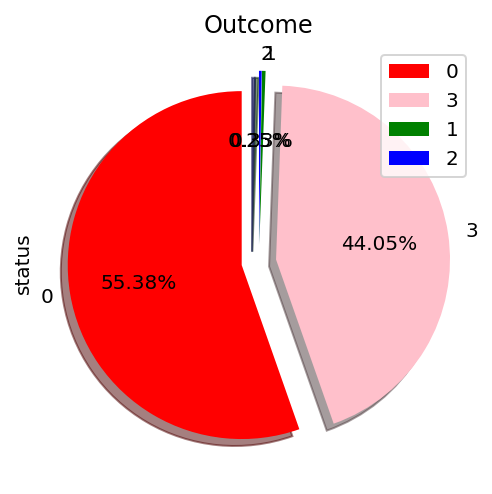

In [3]:
print(df.status.value_counts())
color=['r',"pink","green","blue"]
df['status'].value_counts().plot.pie(colors=color,startangle=90, shadow=True,explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.2f%%').set_title('Outcome')
plt.legend()
plt.show

In [4]:
a=(df.status.value_counts()[0] / df.status.count())*100
a=a.round(3)
print(a)
b=(df.status.value_counts()[1] / df.status.count())*100
b=b.round(3)
print(b)
c=(df.status.value_counts()[2] / df.status.count())*100
c=c.round(3)
print(c)
d=(df.status.value_counts()[3] / df.status.count())*100
d=d.round(3)
print(d)

55.376
0.326
0.25
44.048


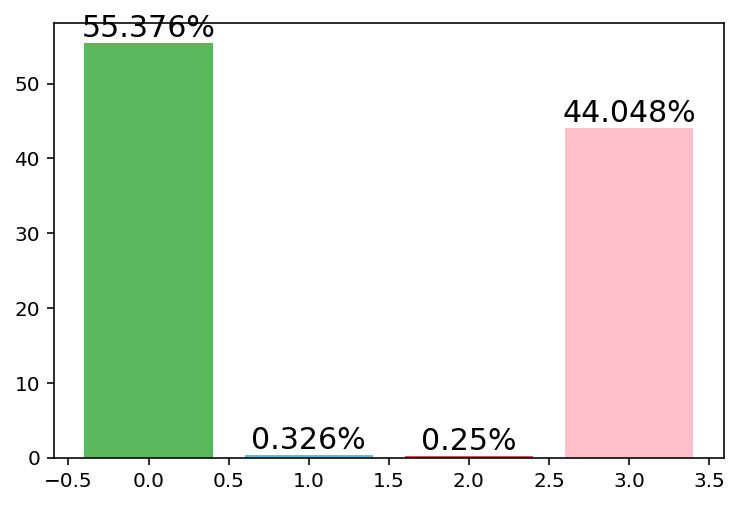

In [9]:
LABELS = ["Normal", "Mild","Moderate","Severe"]
frequencies = (a,b,c,d)

plt.figure()
colors=['#5cb85c','#5bc0de','#d9534f','pink']
p1 = plt.bar(np.arange(len(frequencies)), frequencies,color=colors)

for rect1 in p1:
    height = rect1.get_height()
    plt.annotate( "{}%".format(height),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)

plt.show()


Text(0, 0.5, 'Frequency')

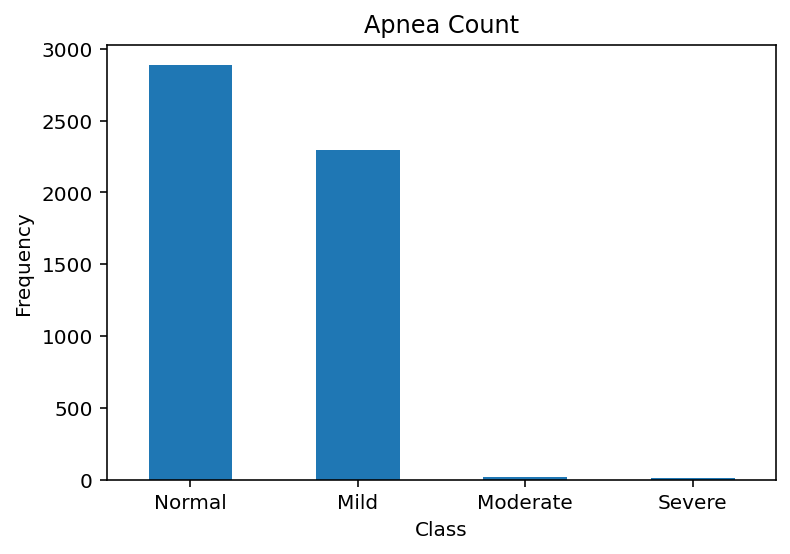

In [10]:
LABELS = ["Normal", "Mild","Moderate","Severe"]

count_classes = pd.value_counts(df['status'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Apnea Count")

plt.xticks(range(4), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [11]:
X = df.drop('status', axis=1)   # axis=0 for row, axis=1 for column
y = df['status']
y

0       0
1       0
2       0
3       0
4       0
       ..
5203    3
5204    3
5205    3
5206    3
5207    0
Name: status, Length: 5208, dtype: int64

In [12]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [13]:
Counter(y)

Counter({0: 2884, 3: 2294, 2: 13, 1: 17})

In [14]:
rus = RandomUnderSampler() 
# resampling X, y
X_rus, y_rus = rus.fit_resample(X, y)
# new class distribution
print(Counter(y_rus))

Counter({0: 13, 1: 13, 2: 13, 3: 13})


In [15]:
y_rus

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    2
27    2
28    2
29    2
30    2
31    2
32    2
33    2
34    2
35    2
36    2
37    2
38    2
39    3
40    3
41    3
42    3
43    3
44    3
45    3
46    3
47    3
48    3
49    3
50    3
51    3
Name: status, dtype: int64

In [16]:
from imblearn import under_sampling
import collections
rus = under_sampling.RandomUnderSampler(
    sampling_strategy={
        0: 17,
        1: 17,
        2: 13,
        3:17
    },
    random_state=42
)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % collections.Counter(y_res))

Resampled dataset shape Counter({0: 17, 1: 17, 3: 17, 2: 13})


In [17]:
y_res

0     0
1     0
2     0
3     0
4     0
     ..
59    3
60    3
61    3
62    3
63    3
Name: status, Length: 64, dtype: int64

Text(0, 0.5, 'Frequency')

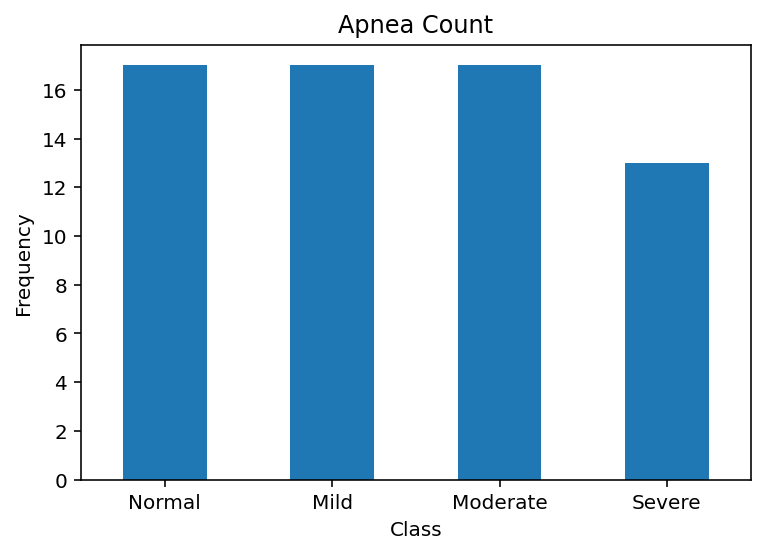

In [18]:
LABELS = ["Normal", "Mild","Moderate","Severe"]

count_classes = pd.value_counts(y_res, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Apnea Count")

plt.xticks(range(4), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

0    17
1    17
3    17
2    13
Name: status, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

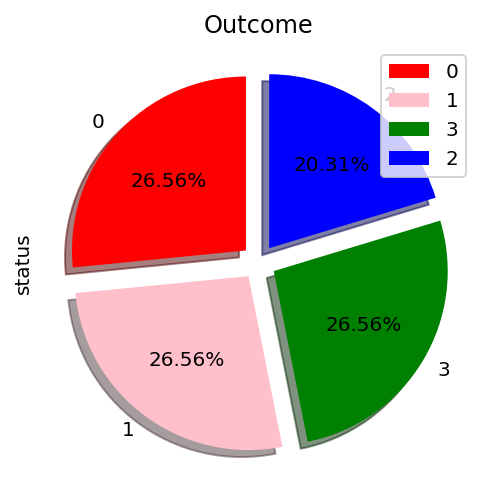

In [19]:
print(y_res.value_counts())
color=['r',"pink","green","blue"]
y_res.value_counts().plot.pie(colors=color,startangle=90, shadow=True,explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.2f%%').set_title('Outcome')
plt.legend()
plt.show

In [20]:
y_res.shape

(64,)

In [21]:
X_res.shape

(64, 11)

In [22]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:11]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

      Specs        Score
3    Weight  4771.473710
7     Waist  3199.638330
2       BMI  1189.204789
8   Buttock   809.847215
1       ESS   732.408253
6      Neck   665.322042
9       Age   390.301311
10        M   137.170498
4    Height    80.044040
5      Head    29.100049
0        BQ    10.907233


[0.01869202 0.07431129 0.12201278 0.1139622  0.07129072 0.06776273
 0.12259142 0.15640358 0.09978927 0.09198117 0.06120281]


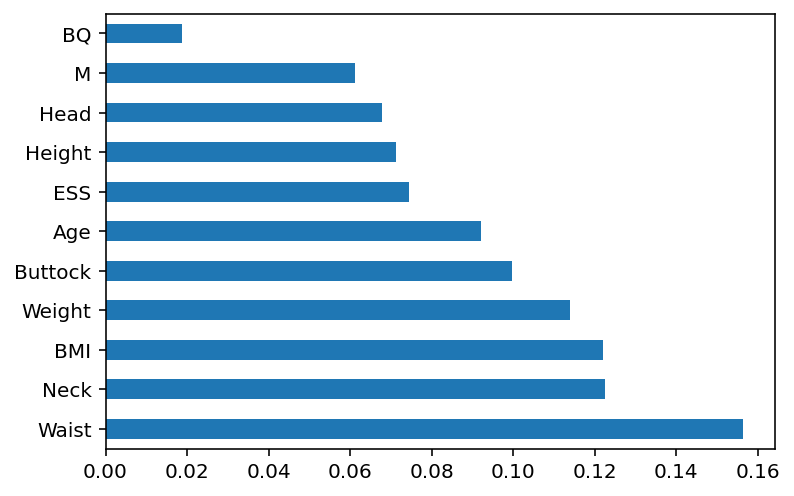

In [23]:
X = df.iloc[:,0:11]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
#from sklearn.ensemble import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

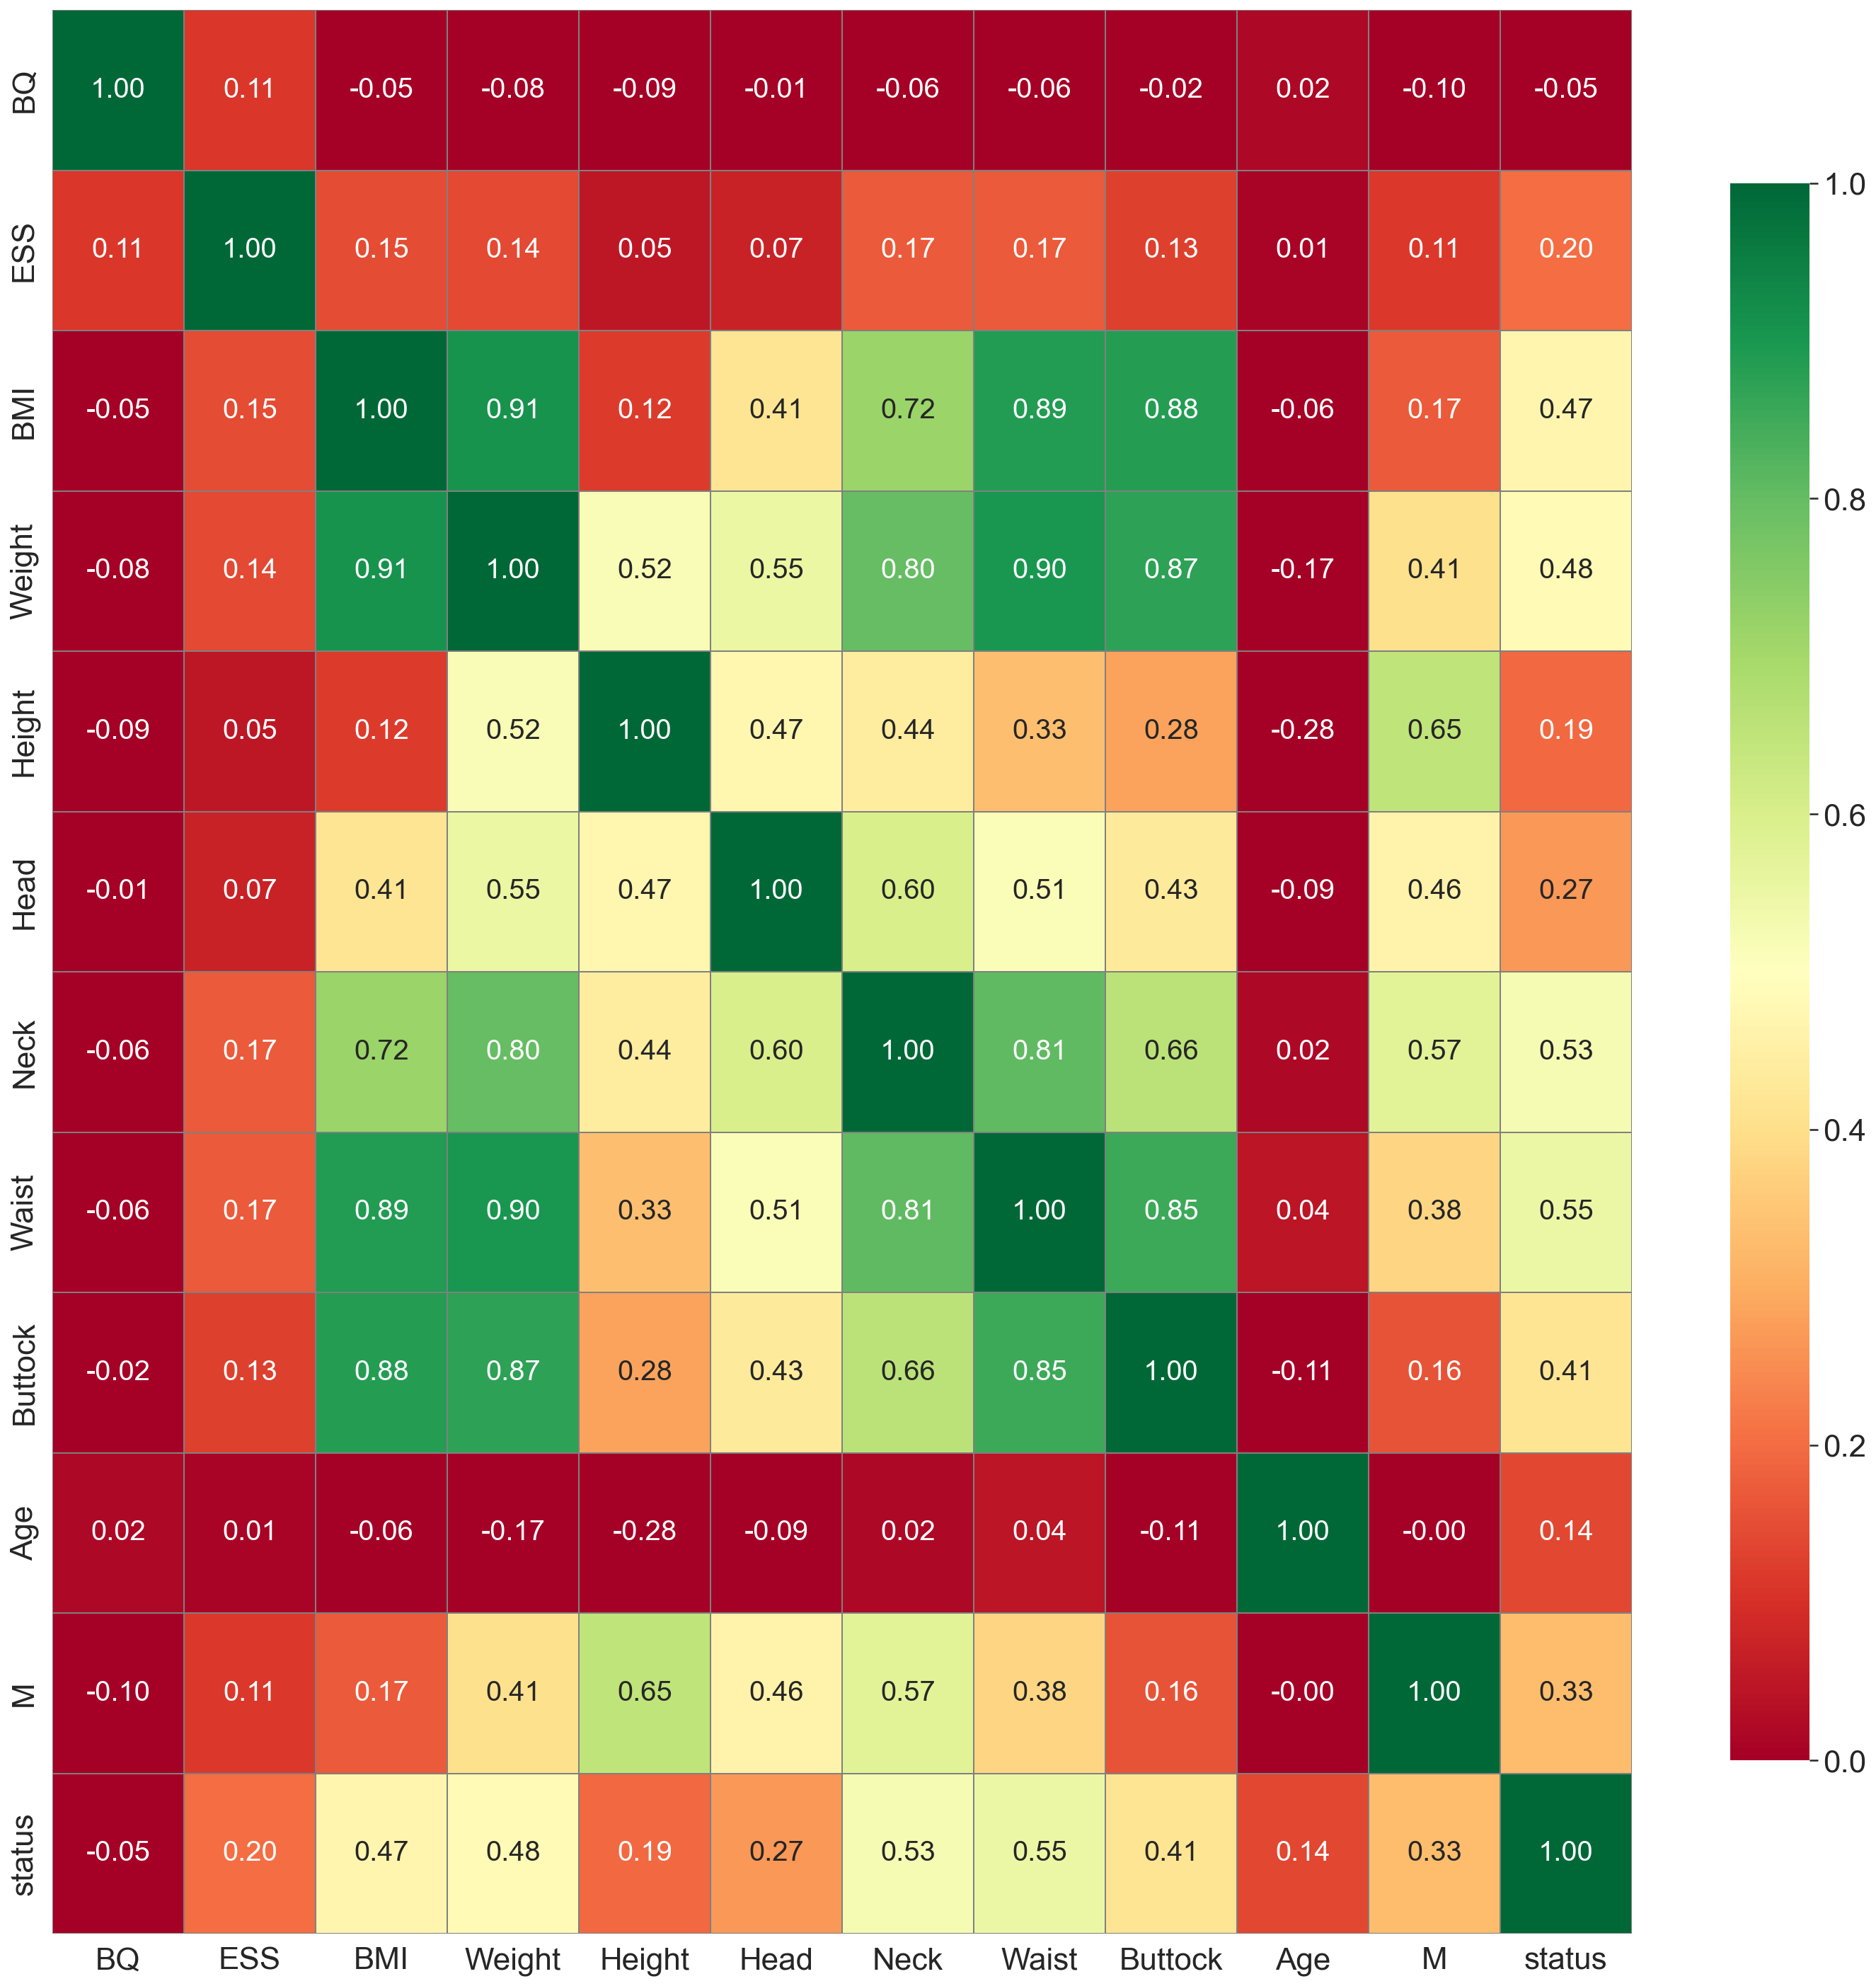

In [24]:
X = df.iloc[:,0:11]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
sns.set(font_scale=2)
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn",vmin=0.0, vmax=1.0, 
                  annot_kws={"size": 20},
                  fmt='.2f', cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (51, 11)
y_train (51,)
X_test (13, 11)
y_test (13,)


In [70]:
def evaluate(model, X_test , y_test,modelname):
  y_pred1=model.predict(X_test)
  #precision    = precision_score(y_test, y_pred1)
 # recall       = recall_score(y_test, y_pred1)
 # f1score      = f1_score(y_test, y_pred1) 
 # rocauc       = roc_auc_score(y_test, y_pred1)
  #logloss      = log_loss(y_test, y_pred1)
  accuracy     = accuracy_score(y_test, y_pred1)
  classification =classification_report(y_test, y_pred1)
  confusion    = confusion_matrix(y_test, y_pred1)

  df_model1 = pd.DataFrame({  'model'        : [modelname],
                             'accuracy'     : [accuracy],
                            'classification':[classification],
                             #'precision'    : [precision],
                             #'recall'       : [recall],
                             #'f1score'      : [f1score],
                             #'rocauc'       : [rocauc],
                            # 'logloss'      : [logloss],
                             'timetaken'    : [time2],
                            'confusionmatrix' : [confusion]
                            
                                }) 
  return df_model1

In [71]:
%%time
time2=time.time()
print("base model")
base_model = RandomForestClassifier(random_state=0)
base_model.fit(X_train, y_train)
#base_accuracy = evaluate(base_model, X_test, y_test,modelname)
model1 = evaluate(base_model,  X_test,  y_test, 'RandomForest')
model1.timetaken[0] = time.time() - time2
print("Random Forest")
print(base_model.get_params())
print(model1)

base model
Random Forest
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
          model  accuracy                                     classification  \
0  RandomForest  0.307692                precision    recall  f1-score   ...   

   timetaken                                    confusionmatrix  
0   0.099184  [[0, 1, 2, 2], [0, 3, 0, 0], [1, 2, 0, 0], [0,...  
Wall time: 109 ms


In [72]:
%%time
from sklearn.ensemble import ExtraTreesClassifier

time2=time.time()
print("base model")
base_model1 = ExtraTreesClassifier(random_state=0)
base_model1.fit(X_train, y_train)
model2 = evaluate(base_model1,  X_test,  y_test, 'Extra Tree')
model2.timetaken[0] = time.time() - time2
print("Extra Tree")
print(base_model1.get_params())

base model
Extra Tree
{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Wall time: 152 ms


In [73]:
%%time
time2=time.time()
print("base model")
base_model2 = LogisticRegression(random_state=0)
base_model2.fit(X_train, y_train)
model3 = evaluate(base_model2,  X_test,  y_test, 'Logistic Regression')
model3.timetaken[0] = time.time() - time2
print("Logoistic Regression")
print(base_model2.get_params())

base model
Logoistic Regression
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Wall time: 24.7 ms


In [74]:
%%time
time2=time.time()
print("base model")
base_model3 = KNeighborsClassifier()
base_model3.fit(X_train, y_train)
model4 = evaluate(base_model3,  X_test,  y_test, 'KNN')
model4.timetaken[0] = time.time() - time2
print("KNN")
print(base_model3.get_params())

base model
KNN
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Wall time: 20.3 ms


In [75]:
%%time
time2=time.time()
print("base model")
base_model4 = LinearSVC(random_state=0)
base_model4.fit(X_train, y_train)
model5 = evaluate(base_model4,  X_test,  y_test, 'LinearSVC')
model5.timetaken[0] = time.time() - time2
print("LinearSVC")
print(base_model4.get_params())

base model
LinearSVC
{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 0, 'tol': 0.0001, 'verbose': 0}
Wall time: 20.5 ms


In [76]:
%%time
time2=time.time()
print("base model")
base_model5 = GaussianNB()
base_model5.fit(X_train, y_train)
model6 = evaluate(base_model5,  X_test,  y_test, 'GaussianNB')
model6.timetaken[0] = time.time() - time2
print("GaussianNB")
print(base_model5.get_params())

base model
GaussianNB
{'priors': None, 'var_smoothing': 1e-09}
Wall time: 14.9 ms


In [77]:
%%time
time2=time.time()
print("base model")
base_model6=SVC(random_state=0)
base_model6.fit(X_train, y_train)
model7 = evaluate(base_model6,  X_test,  y_test, 'SVC')
model7.timetaken[0] = time.time() - time2
print("SVC")
print(base_model6.get_params())

base model
SVC
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Wall time: 7.59 ms


In [78]:
%%time
time2=time.time()
print("base model")
base_model7=DecisionTreeClassifier(random_state=0)
base_model7.fit(X_train, y_train)
model8 = evaluate(base_model7,  X_test,  y_test, 'Decision Tree')
model8.timetaken[0] = time.time() - time2
print("Decision Tree")
print(base_model7.get_params())

base model
Decision Tree
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}
Wall time: 17.9 ms


In [79]:
df_base= pd.concat([model1,model2,model3,model4,model5,model6,model7,model8],axis = 0).reset_index()
df_base.drop('index', axis=1, inplace=True)
df_base

model  accuracy  \
0         RandomForest  0.307692   
1           Extra Tree  0.384615   
2  Logistic Regression  0.384615   
3                  KNN  0.230769   
4            LinearSVC  0.384615   
5           GaussianNB  0.307692   
6                  SVC  0.307692   
7        Decision Tree  0.307692   

                                      classification  timetaken  \
0                precision    recall  f1-score   ...   0.099184   
1                precision    recall  f1-score   ...   0.152133   
2                precision    recall  f1-score   ...   0.024651   
3                precision    recall  f1-score   ...   0.019261   
4                precision    recall  f1-score   ...   0.020466   
5                precision    recall  f1-score   ...   0.014946   
6                precision    recall  f1-score   ...   0.007593   
7                precision    recall  f1-score   ...   0.017854   

                                     confusionmatrix  
0  [[0, 1, 2, 2], [0, 3, 0, 0], [1, 2, 0, 0], [0,...  
1  [[1, 0, 2, 2], [0, 3, 0, 0], [0, 3, 0, 0], [1,...  
2  [[1, 2, 1, 1], [0, 3, 0, 0], [0, 3, 0, 0], [0,...  
3  [[1, 2, 0, 2], [2, 1, 0, 0], [0, 2, 0, 1], [1,...  
4  [[0, 2, 0, 3], [0, 3, 0, 0], [0, 3, 0, 0], [0,...  
5  [[1, 0, 2, 2], [0, 1, 1, 1], [0, 0, 0, 3], [0,...  
6  [[0, 2, 0, 3], [0, 2, 0, 1], [0, 0, 0, 3], [0,...  
7  [[0, 3, 1, 1], [0, 3, 0, 0], [0, 3, 0, 0], [0,...

In [80]:
df_base
df_base.to_csv('D:\MAJOR PROJECT\datasets\Balanced_data1_performance_metrics.csv')

In [81]:
X_res

BQ  ESS        BMI  Weight  Height  Head  Neck  Waist  Buttock   Age  M
0    0   13  22.979568    72.4   177.5  59.0  40.5   94.5    102.0  33.0  1
1    0    8  25.065746    61.0   156.0  55.5  36.5   86.5     96.0  55.0  1
2    0    7  19.146722    46.0   155.0  52.5  28.5   67.0     85.0  45.0  0
3    1    8  21.719250    57.0   162.0  57.0  37.0   79.0     91.5  60.0  1
4    1   12  23.503556    77.0   181.0  57.5  37.5   89.5     94.0  47.0  1
..  ..  ...        ...     ...     ...   ...   ...    ...      ...   ... ..
59   0   15  27.102041    83.0   175.0  58.5  41.0   99.0    103.0  53.0  1
60   0   10  34.680935   105.0   174.0  59.0  43.0  111.0    115.0  50.0  1
61   1   11  32.211757    92.0   169.0  58.2  42.2   99.0    108.5  35.0  1
62   0   14  37.833763   119.2   177.5  58.0  46.5  121.0    118.5  43.0  1
63   0   11  22.598140    70.0   176.0  59.0  37.2   86.0     98.0  40.0  1

[64 rows x 11 columns]

In [82]:
y_res

0     0
1     0
2     0
3     0
4     0
     ..
59    3
60    3
61    3
62    3
63    3
Name: status, Length: 64, dtype: int64

In [83]:
df1 = pd.concat([X_res,y_res],axis='columns')
df1.head()

BQ  ESS        BMI  Weight  Height  Head  Neck  Waist  Buttock   Age  M  \
0   0   13  22.979568    72.4   177.5  59.0  40.5   94.5    102.0  33.0  1   
1   0    8  25.065746    61.0   156.0  55.5  36.5   86.5     96.0  55.0  1   
2   0    7  19.146722    46.0   155.0  52.5  28.5   67.0     85.0  45.0  0   
3   1    8  21.719250    57.0   162.0  57.0  37.0   79.0     91.5  60.0  1   
4   1   12  23.503556    77.0   181.0  57.5  37.5   89.5     94.0  47.0  1   

   status  
0       0  
1       0  
2       0  
3       0  
4       0

In [84]:
df1.to_csv('D:\MAJOR PROJECT\datasets\oversampled_dataset.csv')

In [85]:
# libraries 
#!pip install yellowbrick
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
#Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [86]:
classes =  ["Normal", "Mild","Moderate","Severe"]
classes

['Normal', 'Mild', 'Moderate', 'Severe']

In [87]:
classifiers=[
DecisionTreeClassifier(random_state=0),
SVC(random_state=0),
LinearSVC(random_state=0),
GaussianNB(),
KNeighborsClassifier(),
LogisticRegression(random_state=0),
RandomForestClassifier(random_state=0),
ExtraTreesClassifier(random_state=0)]


In [88]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        visualizer.score(X_test, y_test)
        #visualizer.score(y_test, x_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        Class_report(name,classes)

#Class Prediction Error
def CPE_viz():    
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        #visualizer.score(y_test, x_test)  # Evaluate the model on the test data 
        visualizer.score(X_test, y_test)
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CPE(name,classes)
        
#Confusion matrix
def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        visualizer.score(X_test, y_test)
        #visualizer.score(y_test,  x_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)
        
#ROC-AUC
def ROC_viz():    
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        visualizer.score(X_test, y_test)
        #visualizer.score(y_test, x_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        ROC(name,classes)

#Precision Recall Curve
def PRC_viz():  
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        visualizer.score(X_test, y_test)
        #visualizer.score(y_test, x_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        PRC(name,classes)


In [89]:
# Write function for aggregate metrics
def classifier_metrics():    
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        try: 
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('cohen_kappa_score: {0:.3f}'.format(c_k_s))
        print('log_loss: {0:.3f}'.format(log_metric))
        print('zero_one_loss: {0:.3f}'.format(zero_met))
        print('hemming_loss: {0:.3f}'.format(hl))
        print('matthews_corrcoef: {0:.3f}'.format(mc))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("------------------------------------------------------")

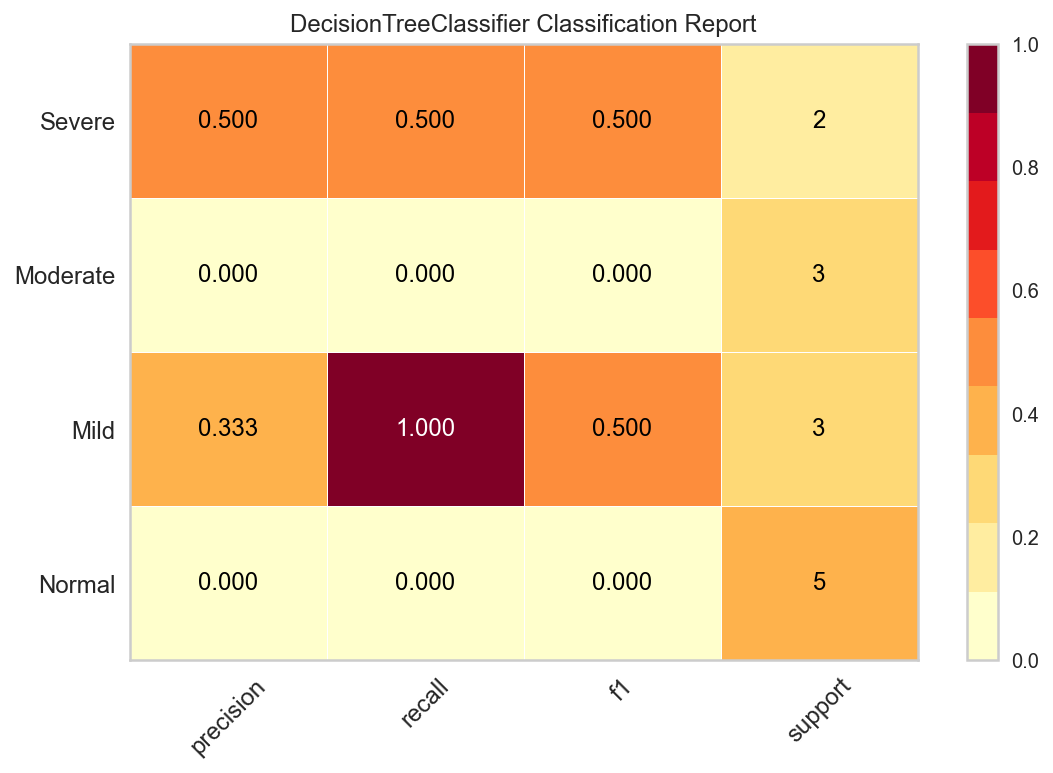

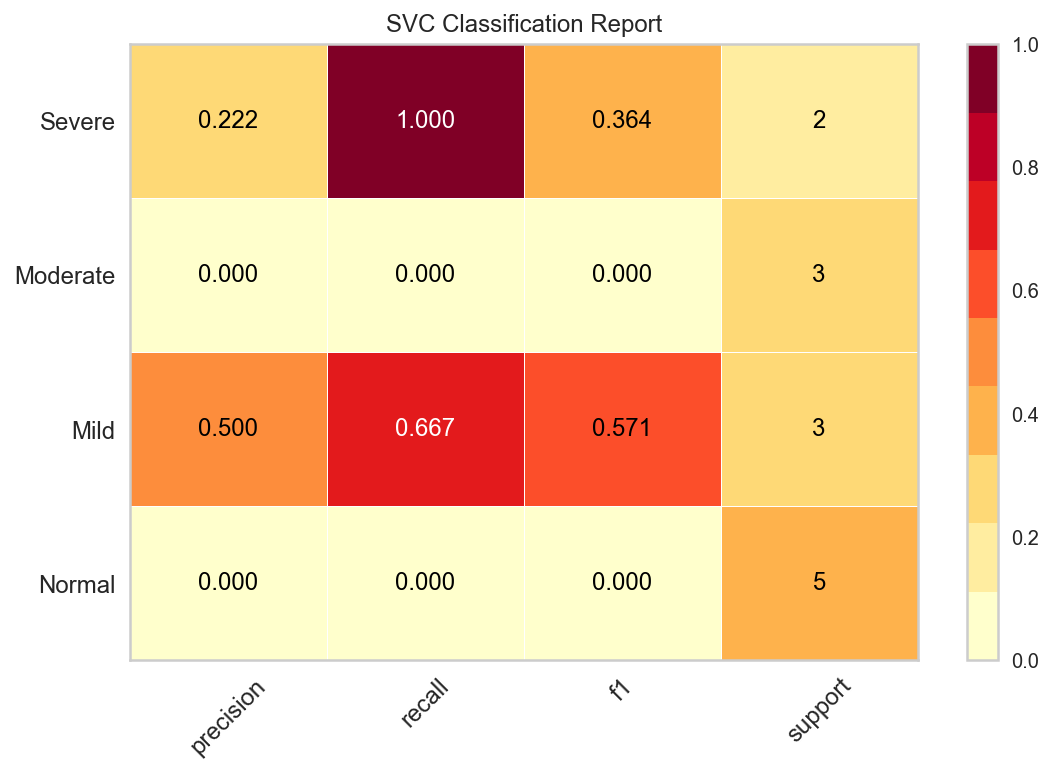

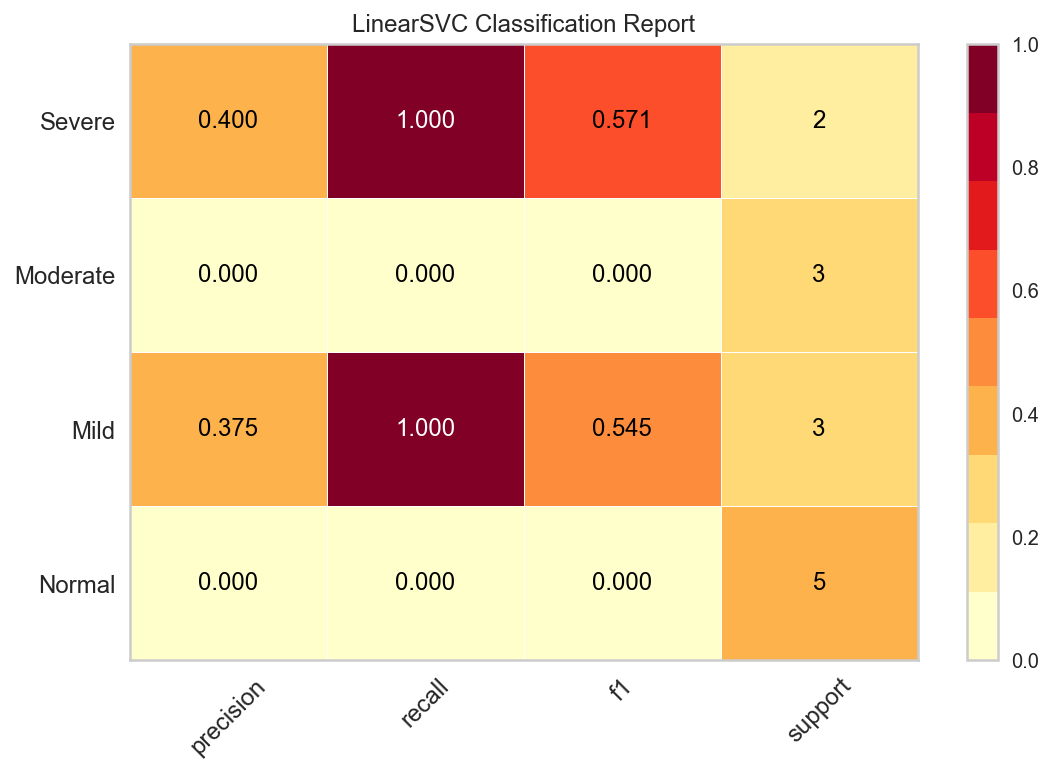

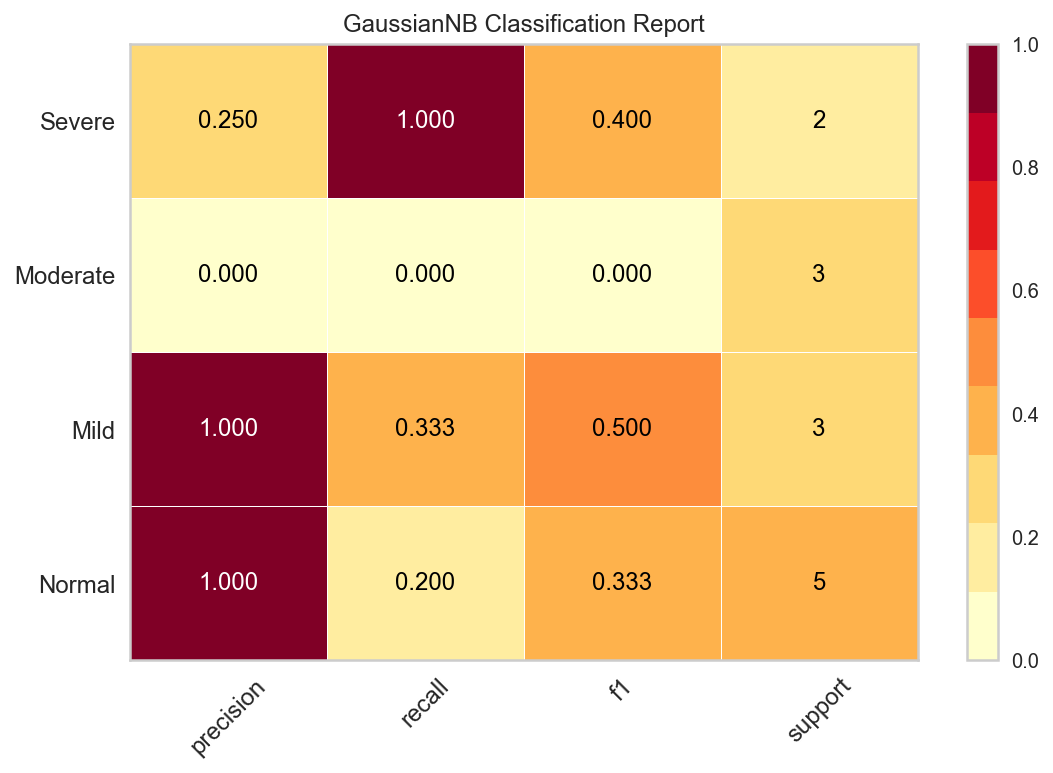

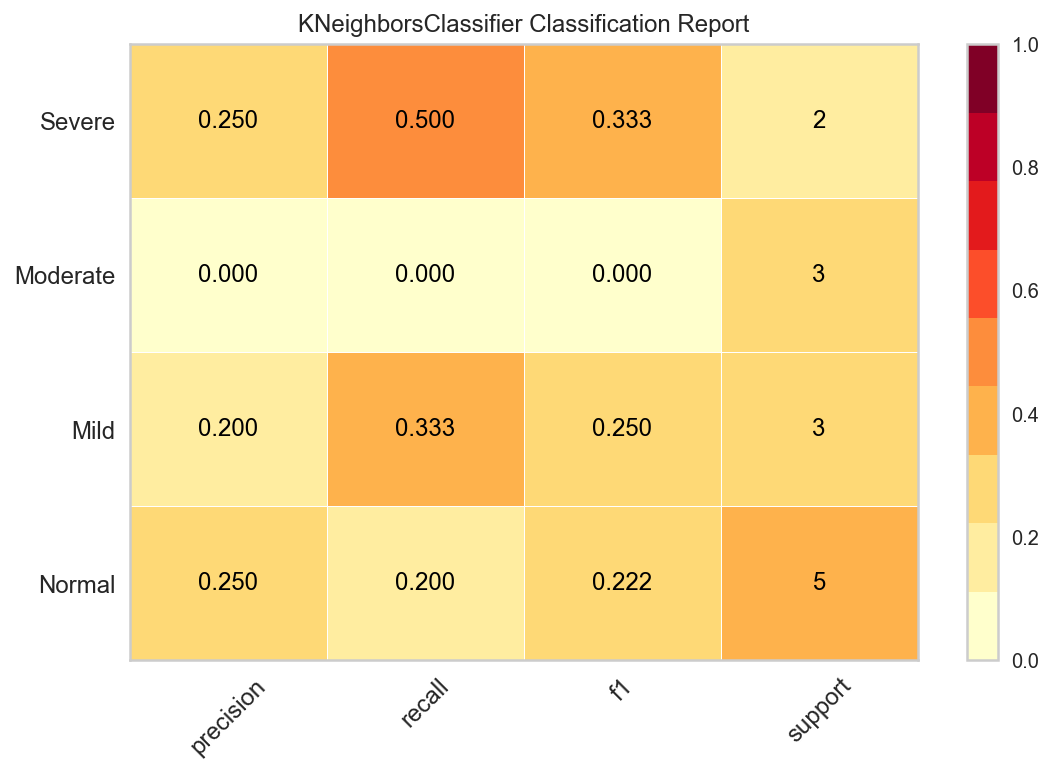

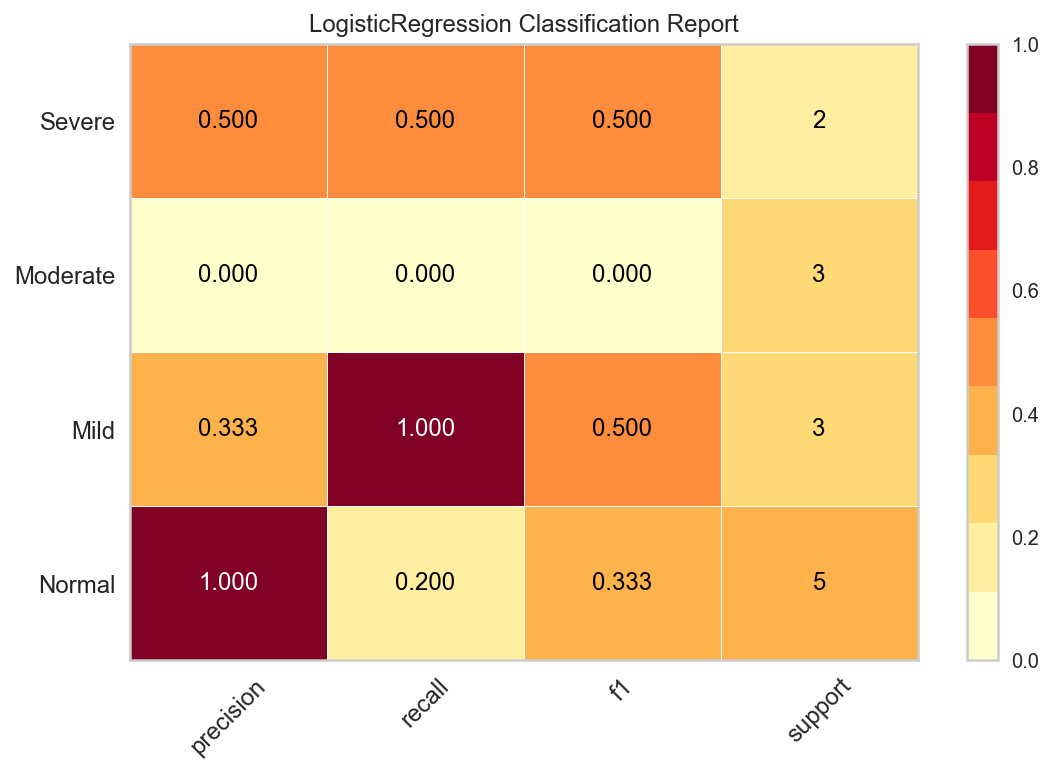

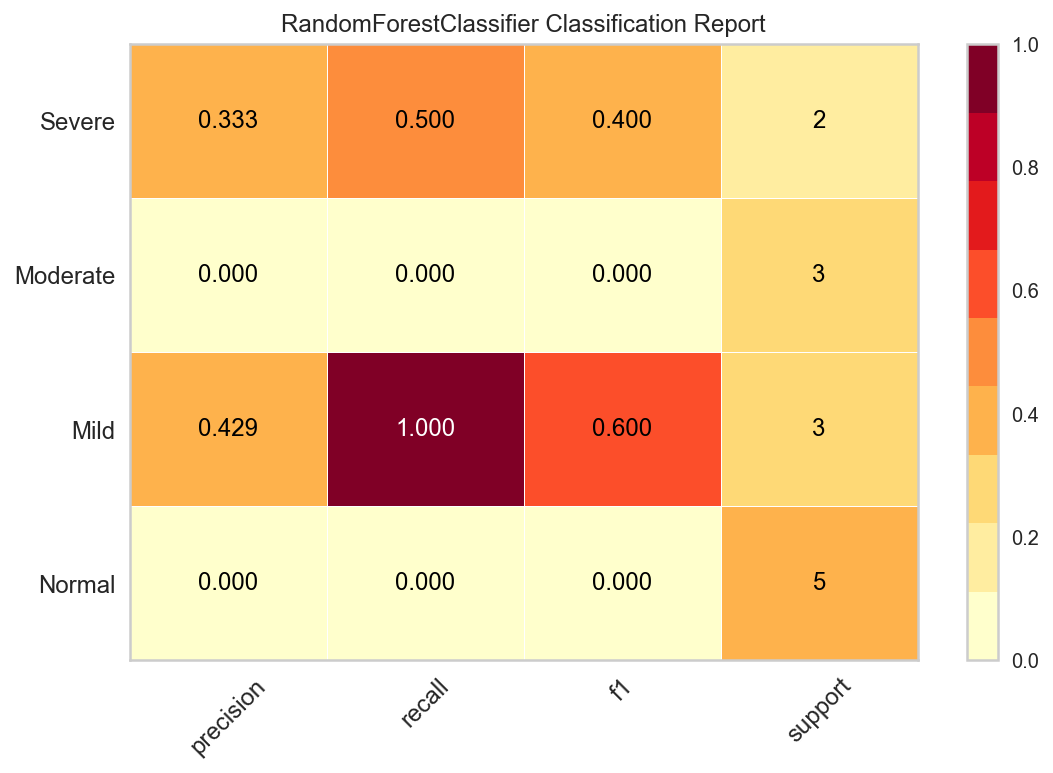

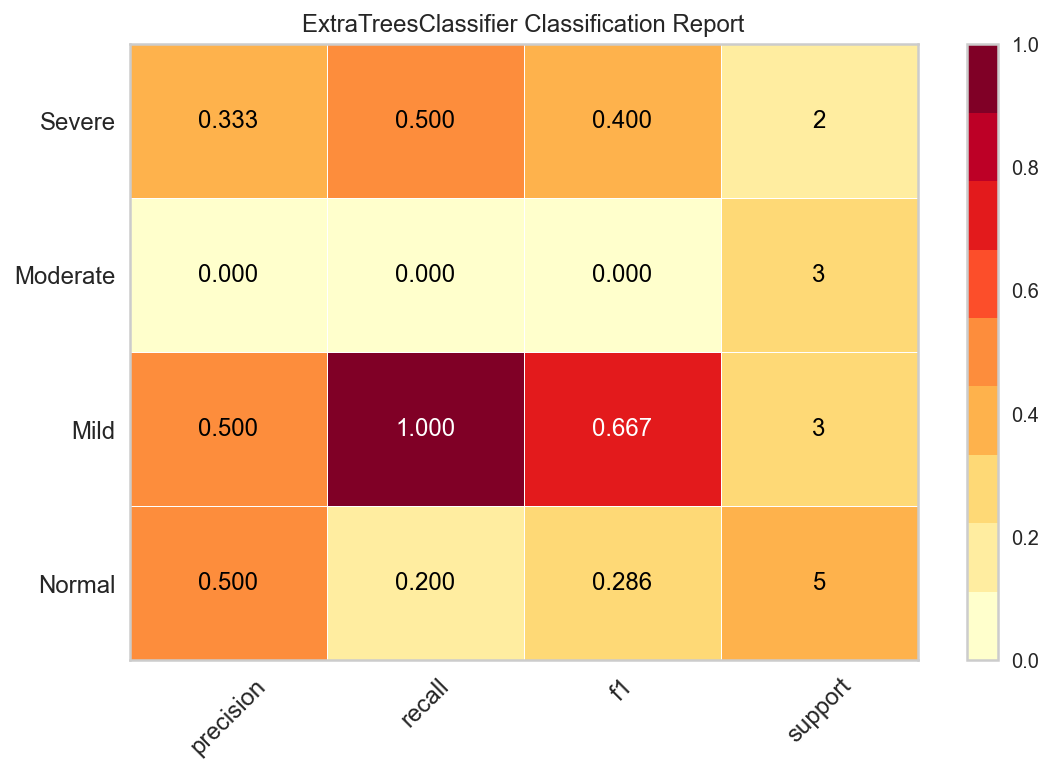

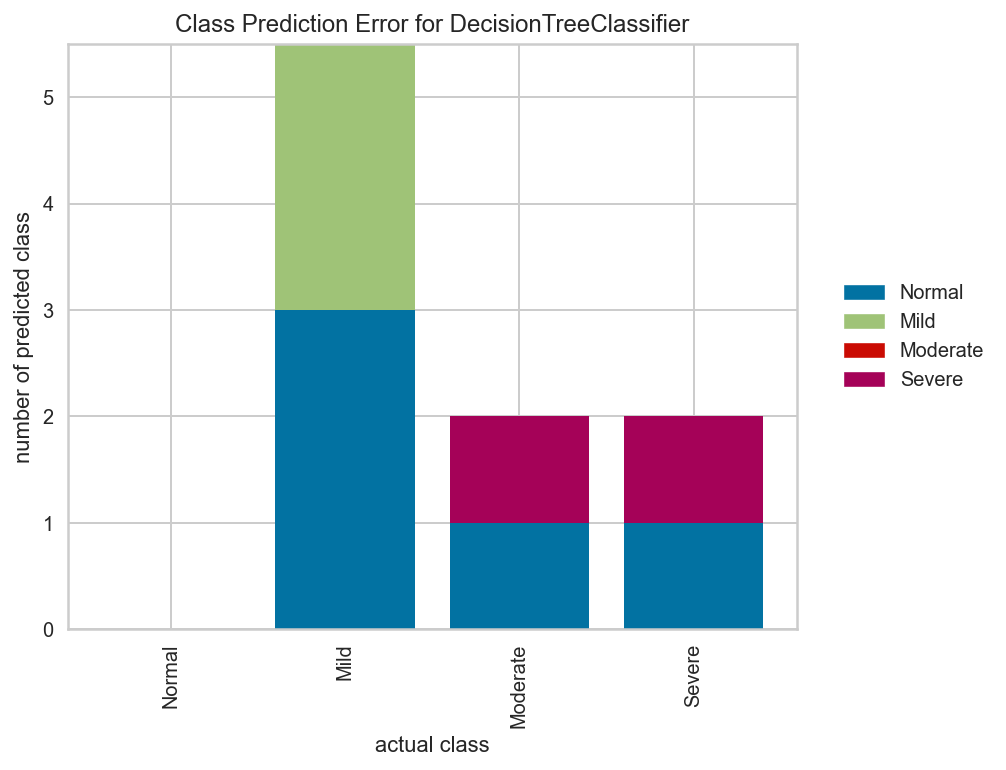

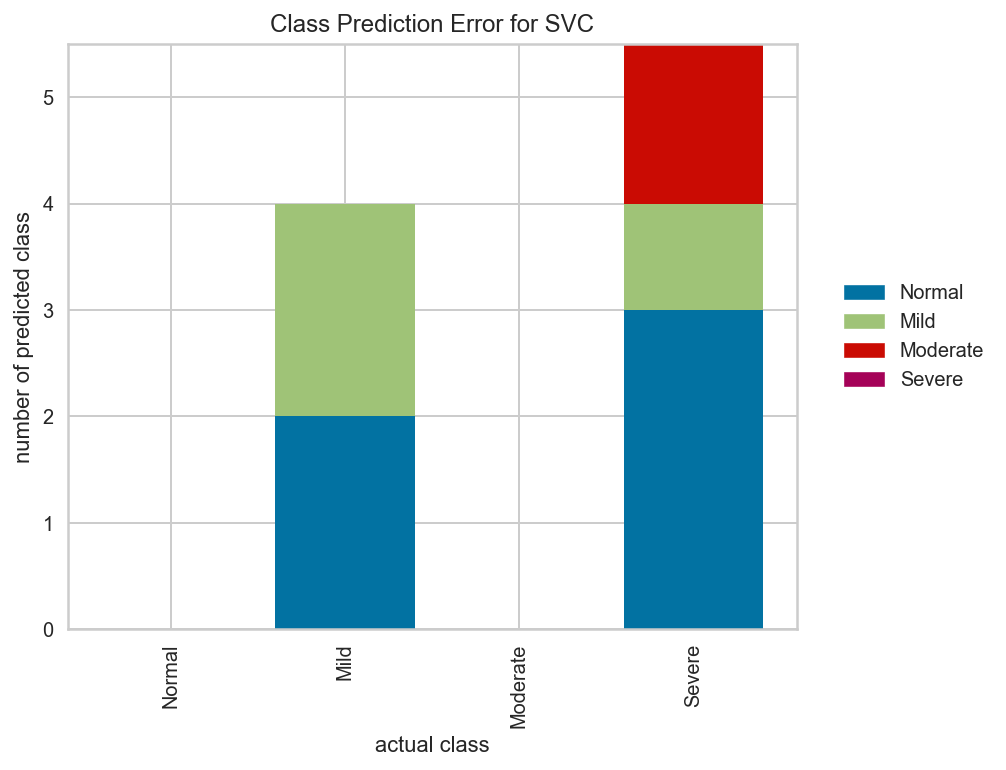

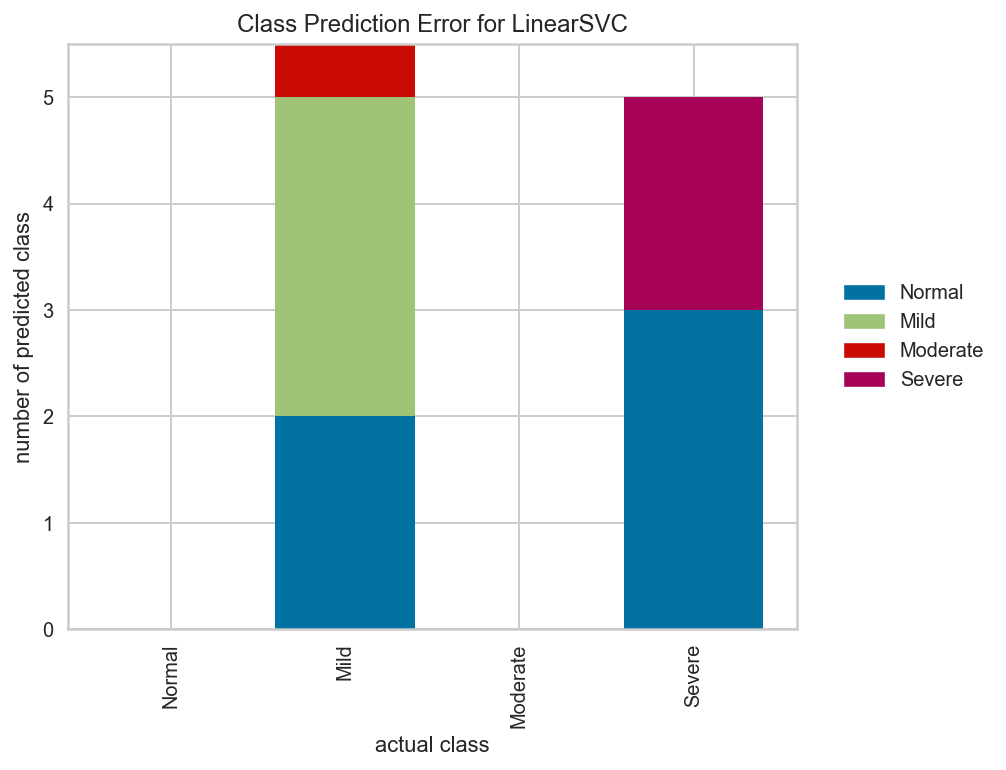

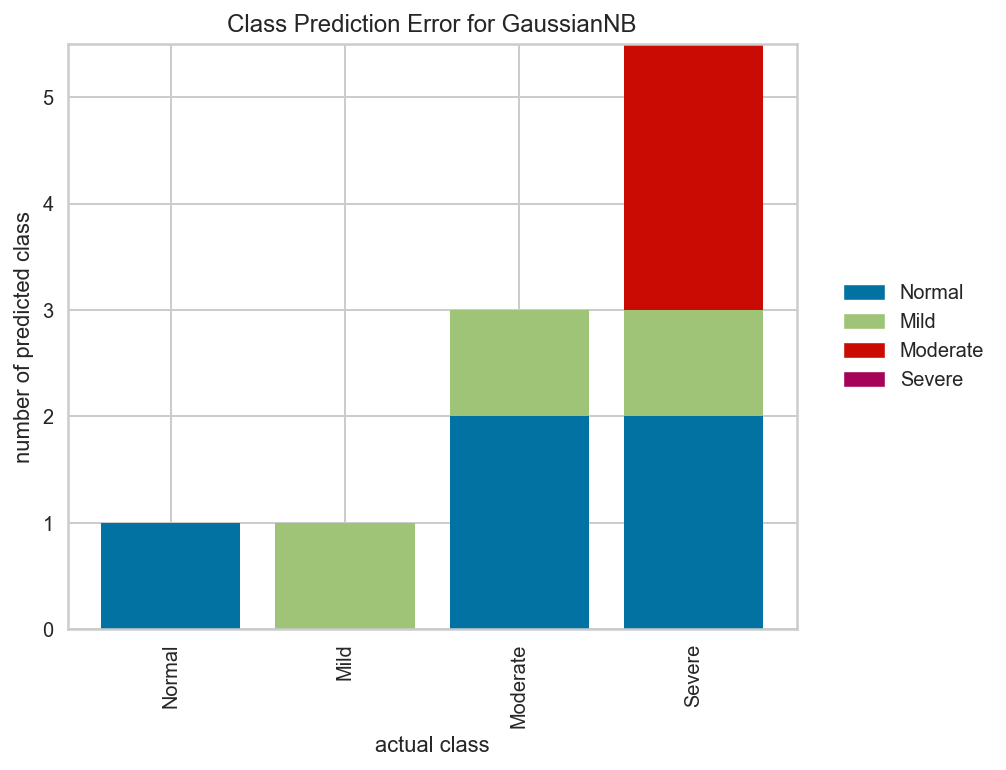

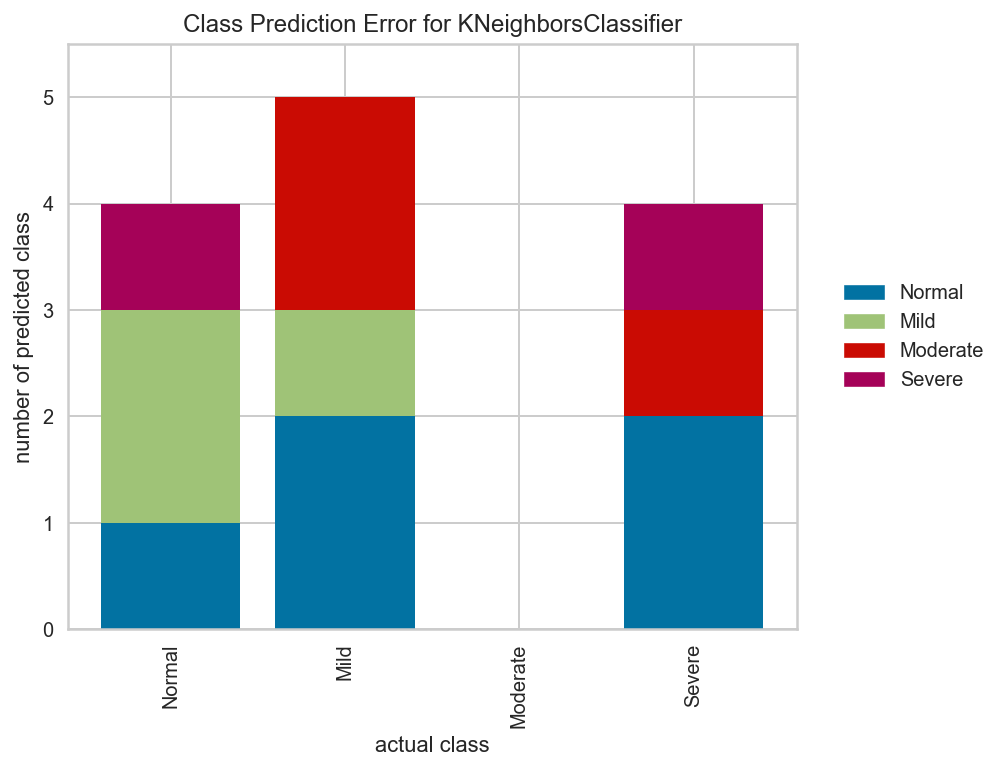

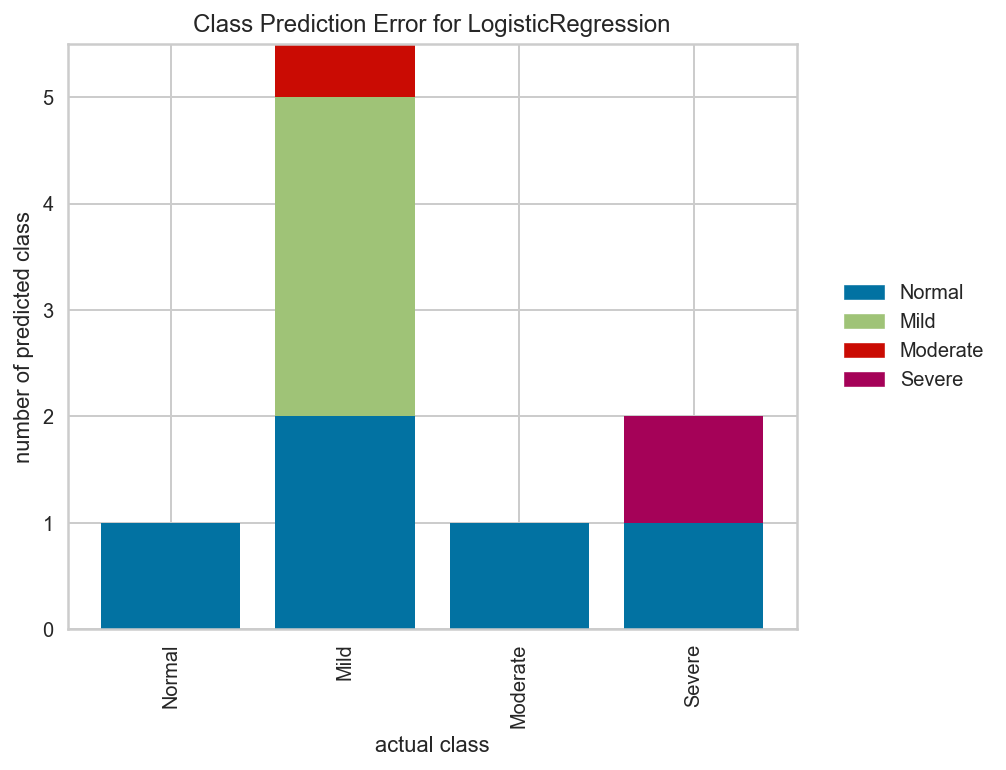

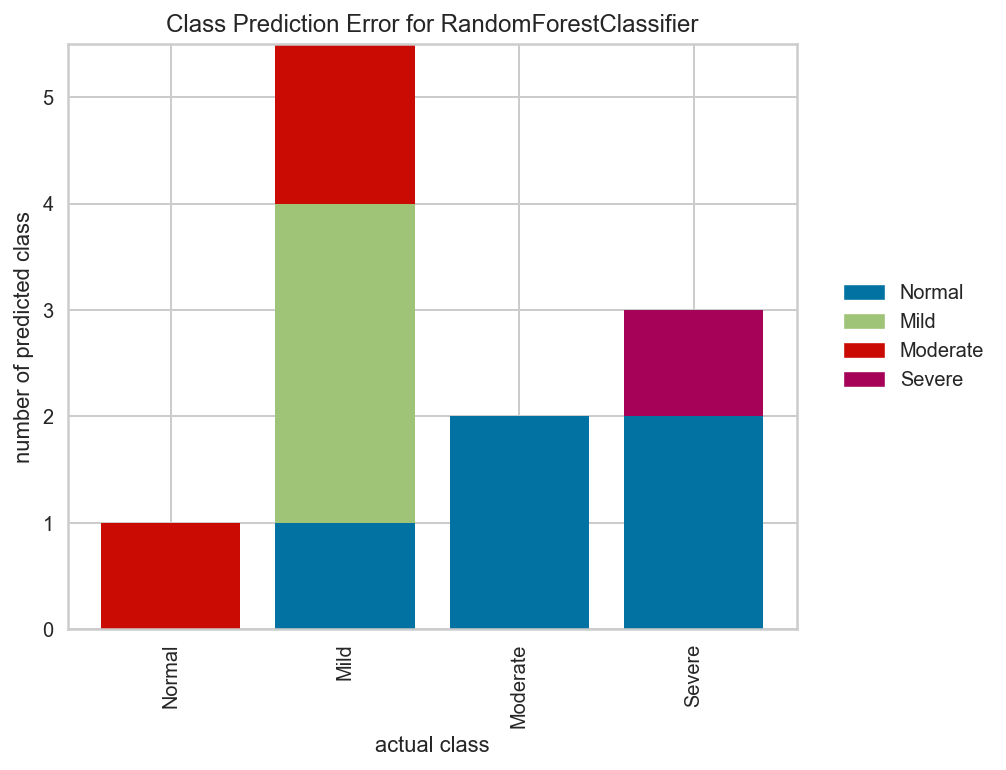

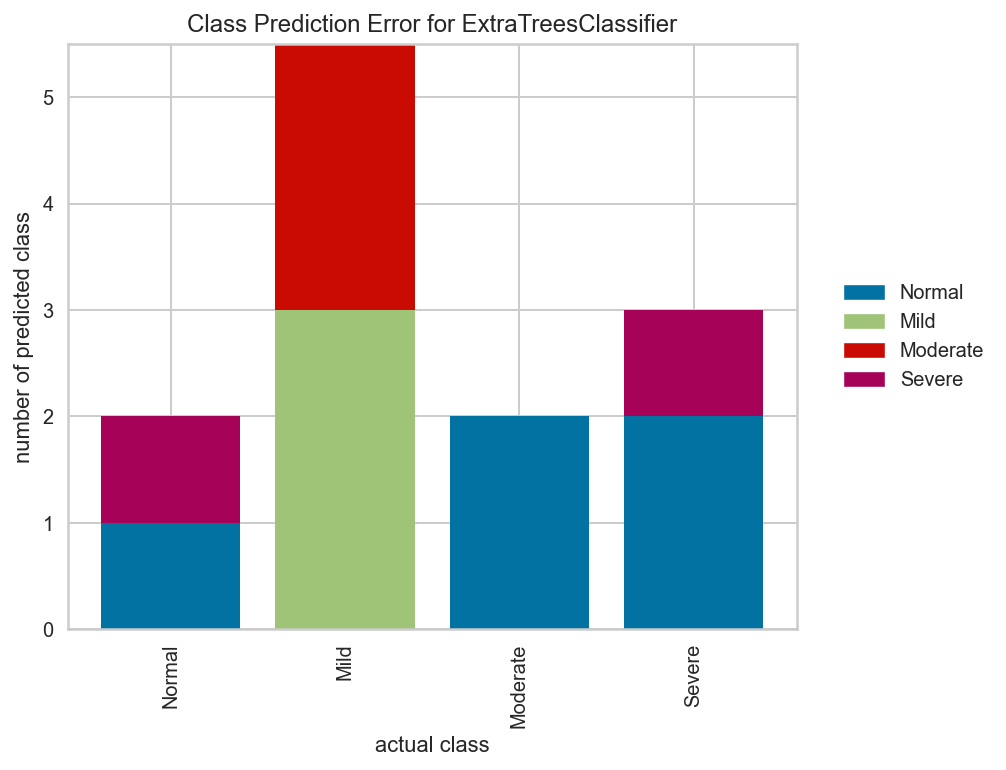

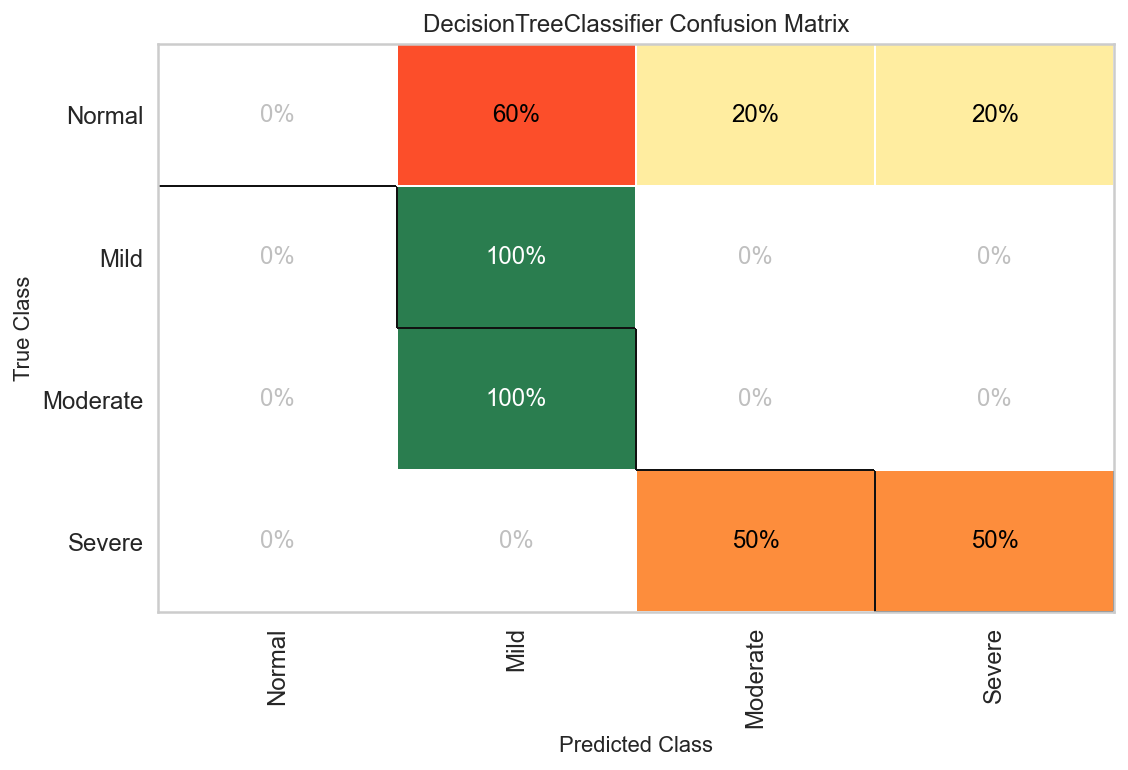

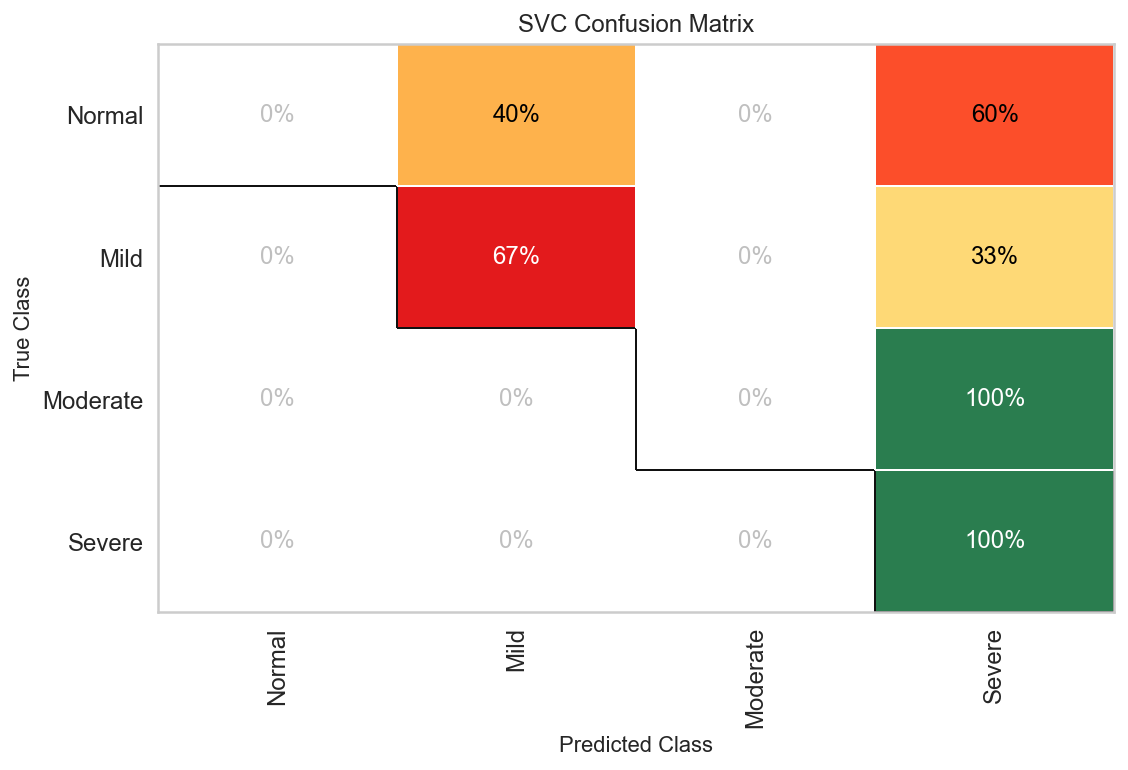

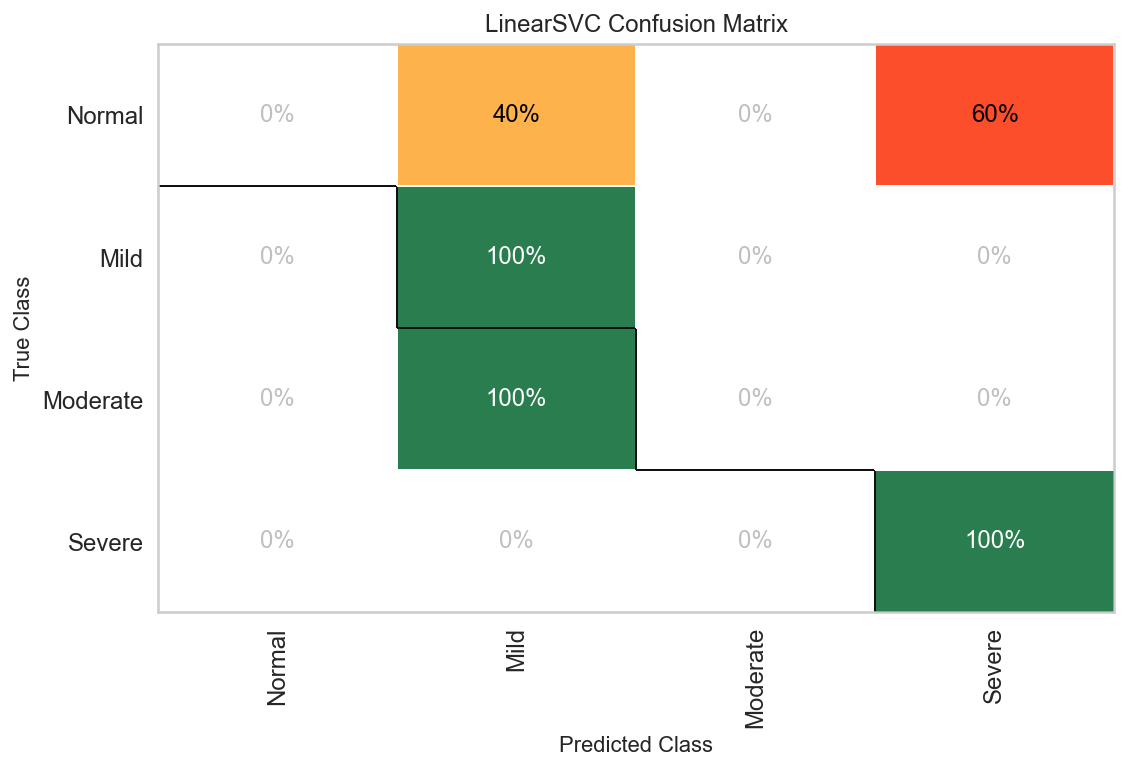

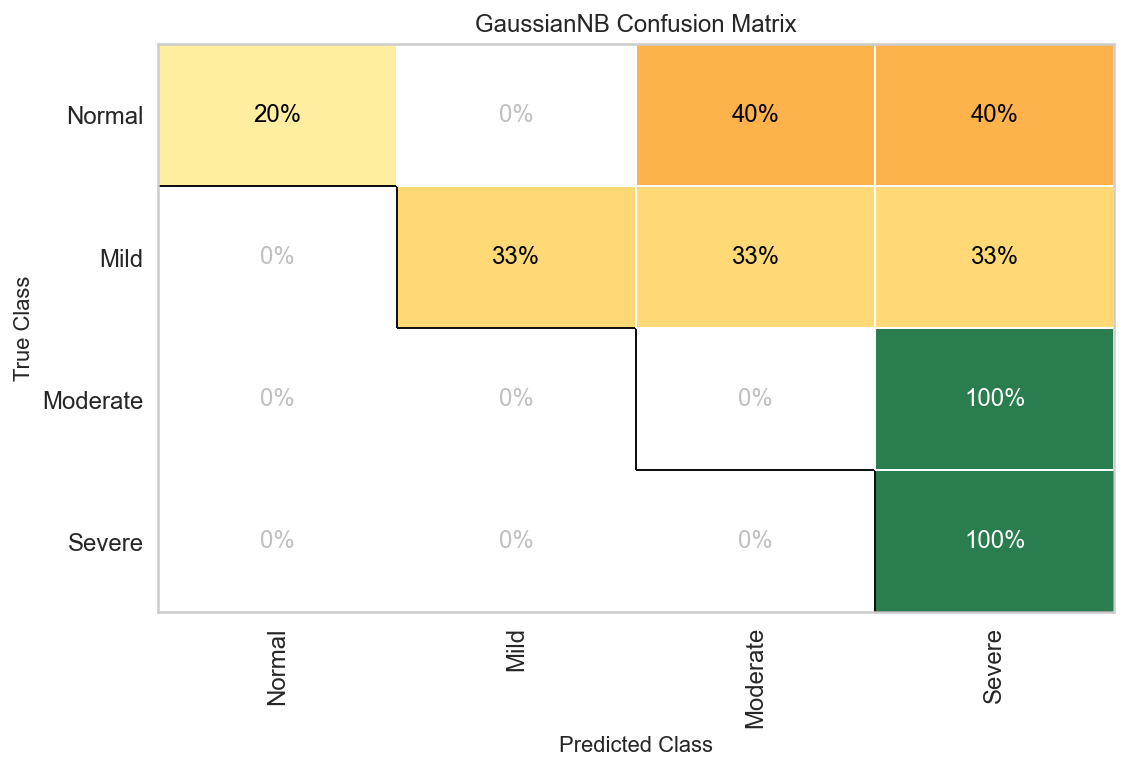

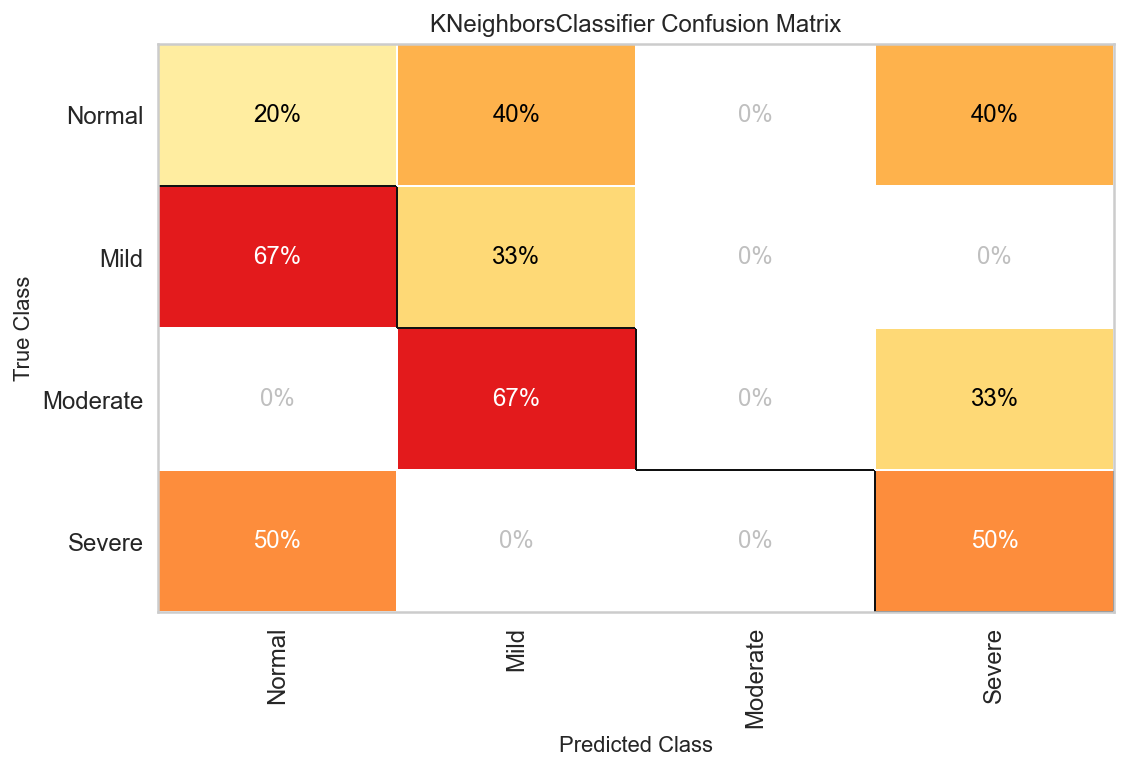

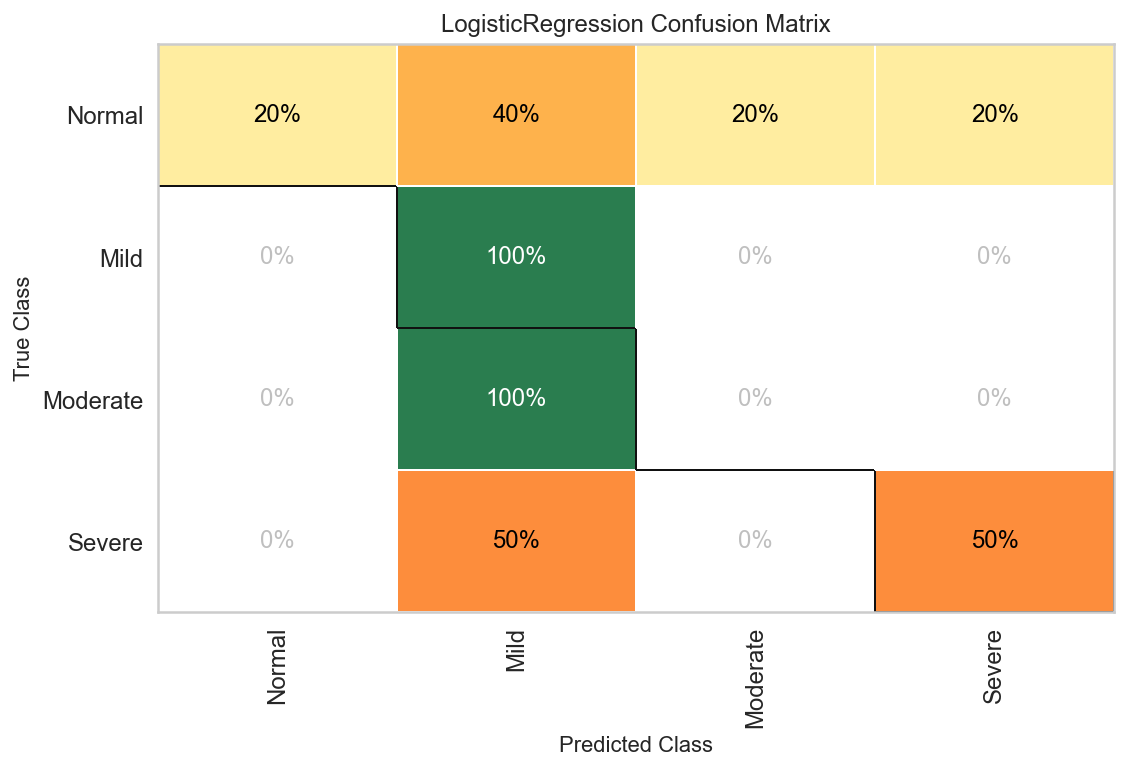

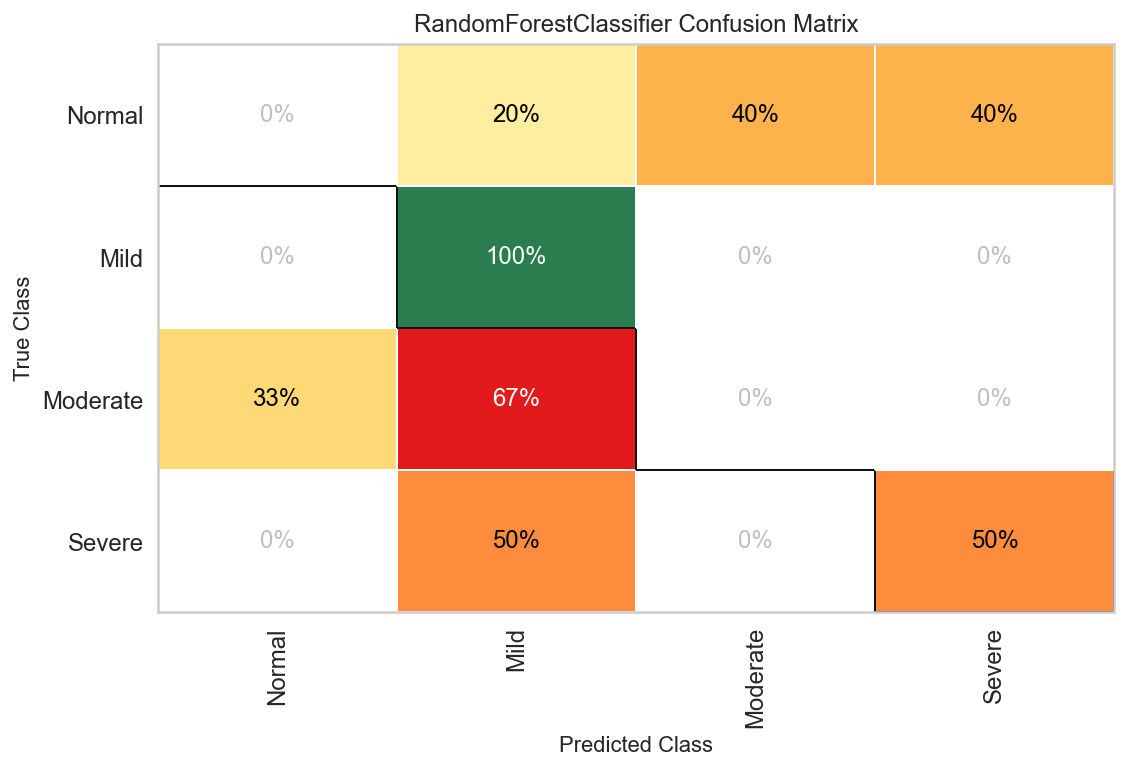

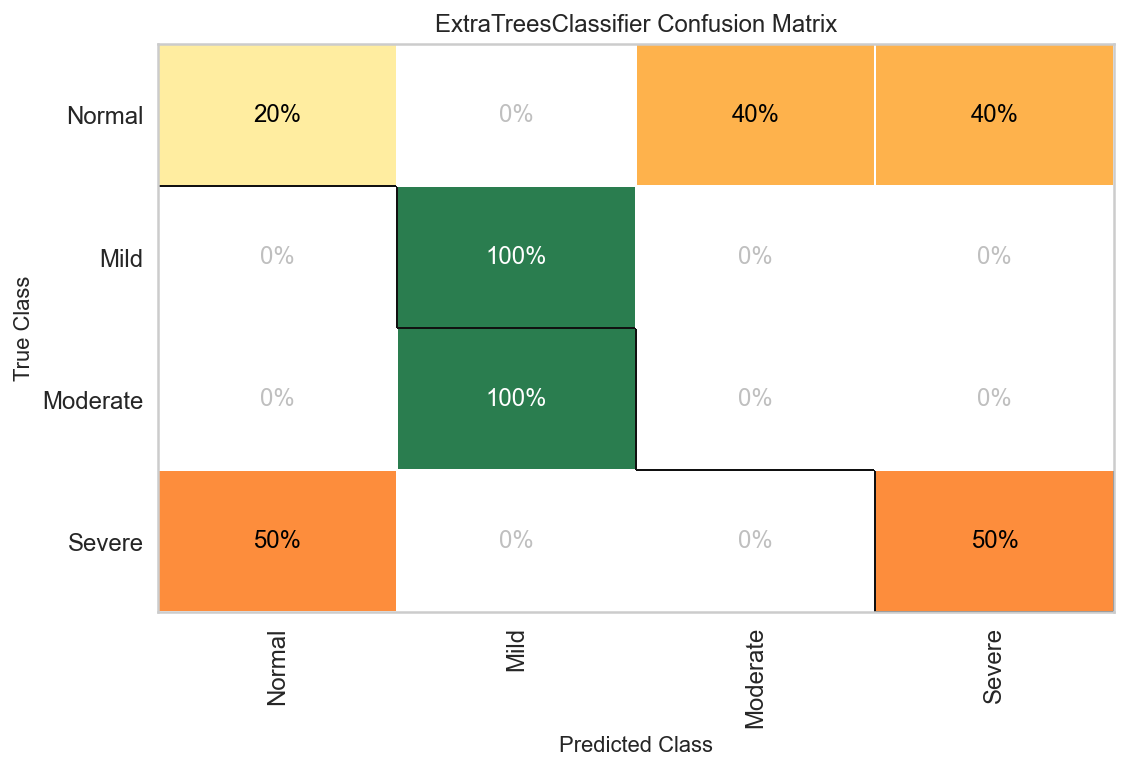

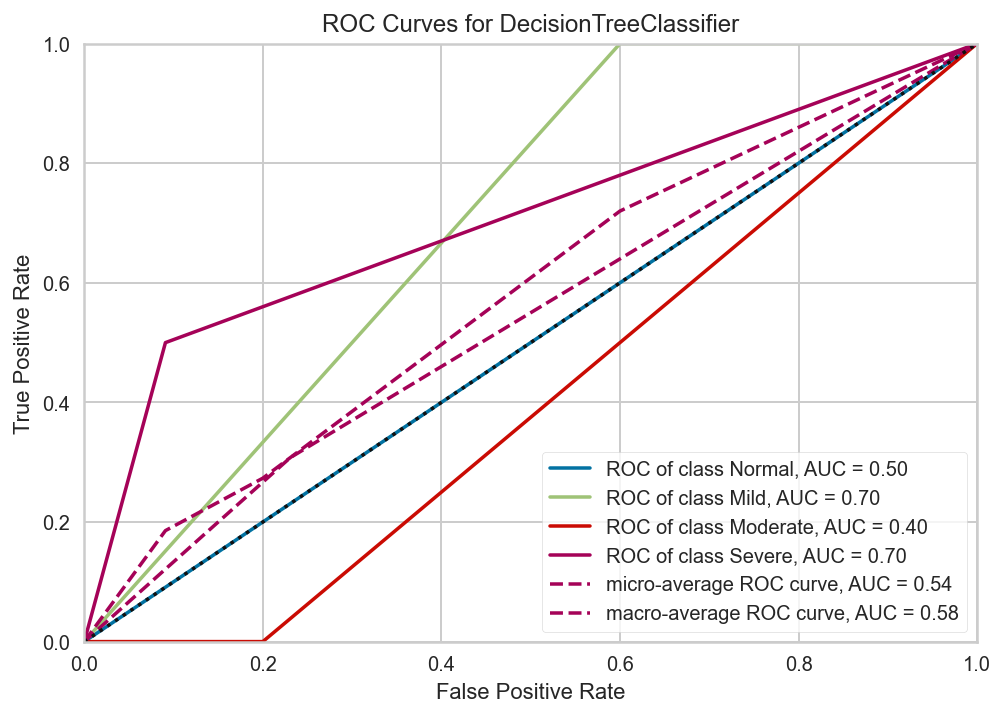

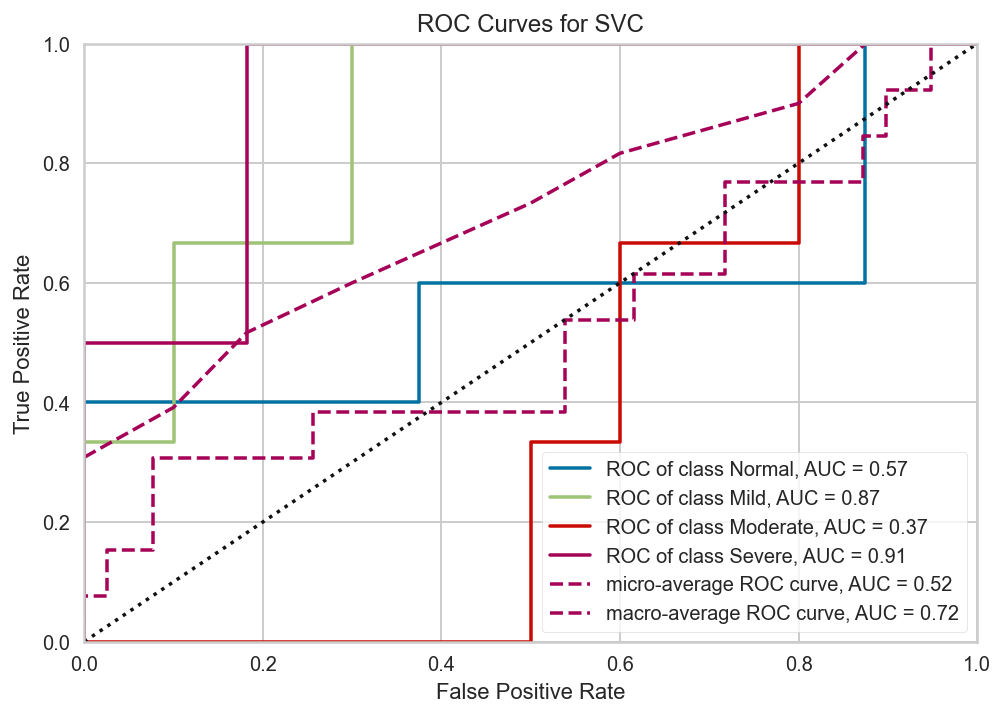

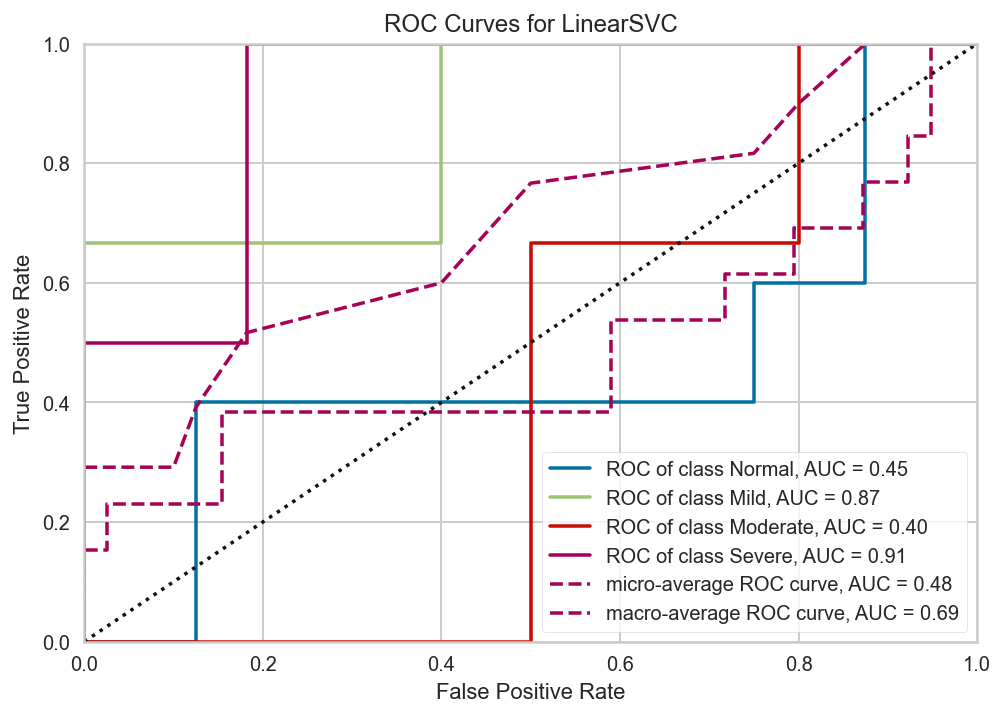

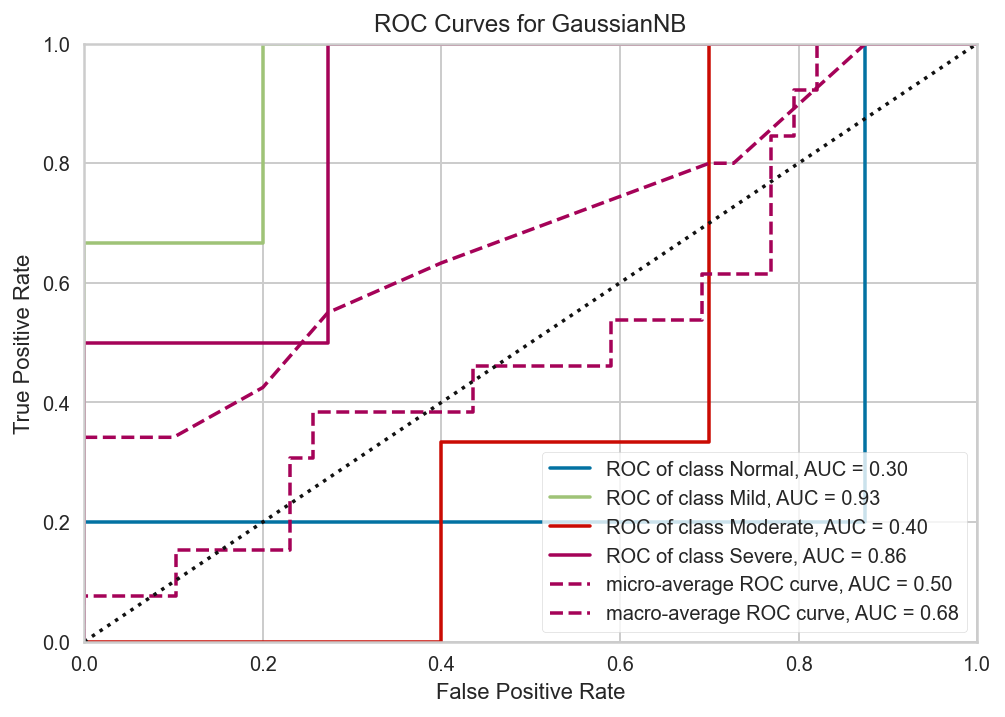

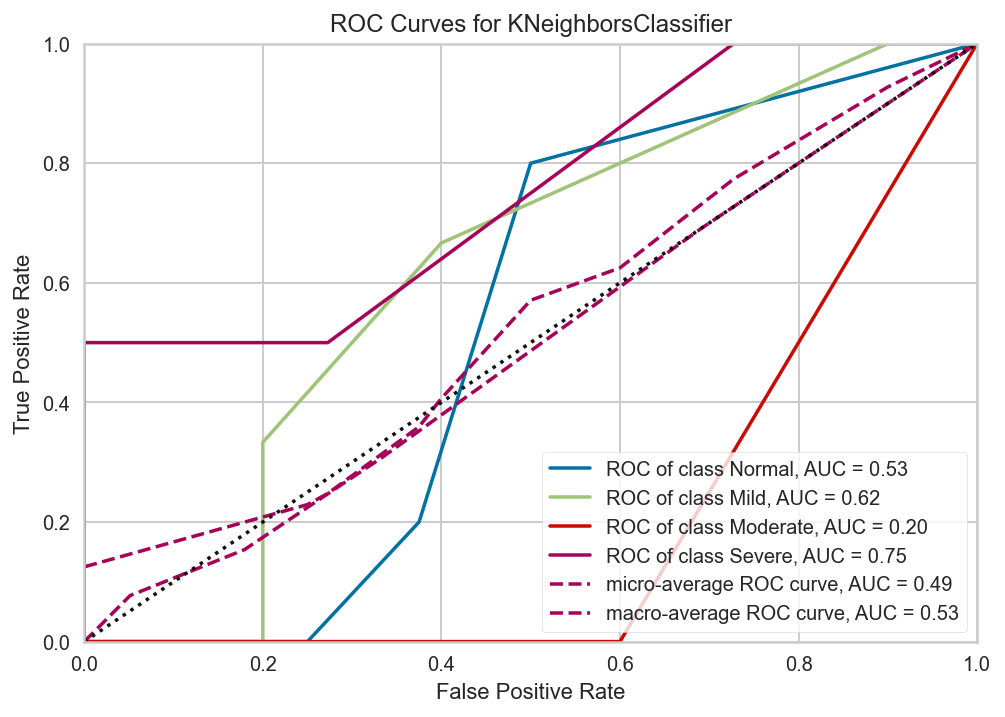

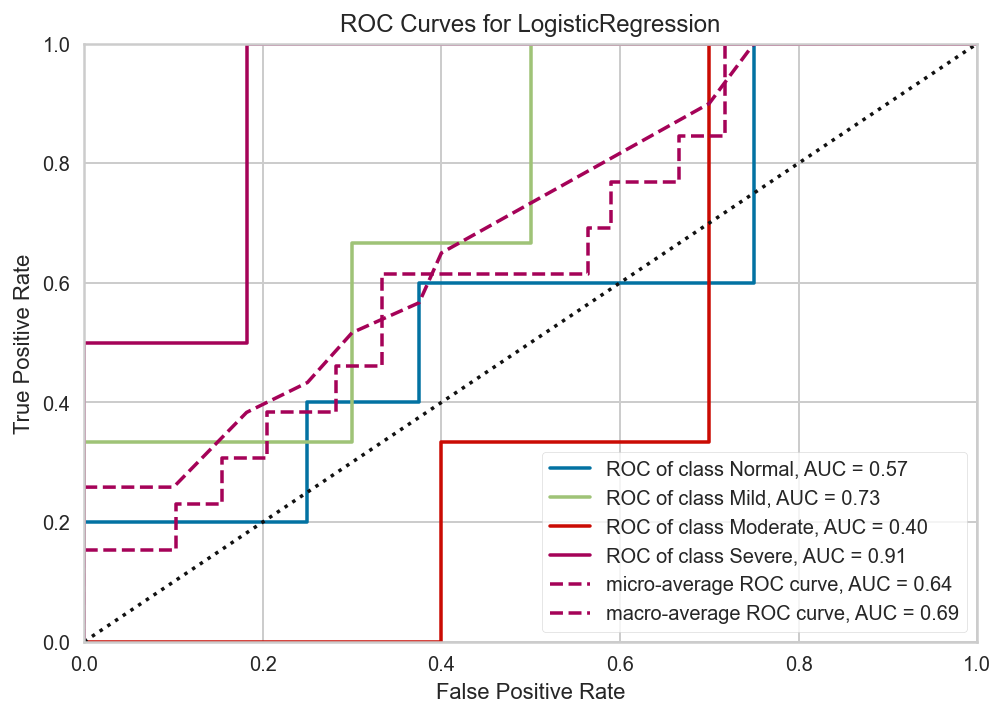

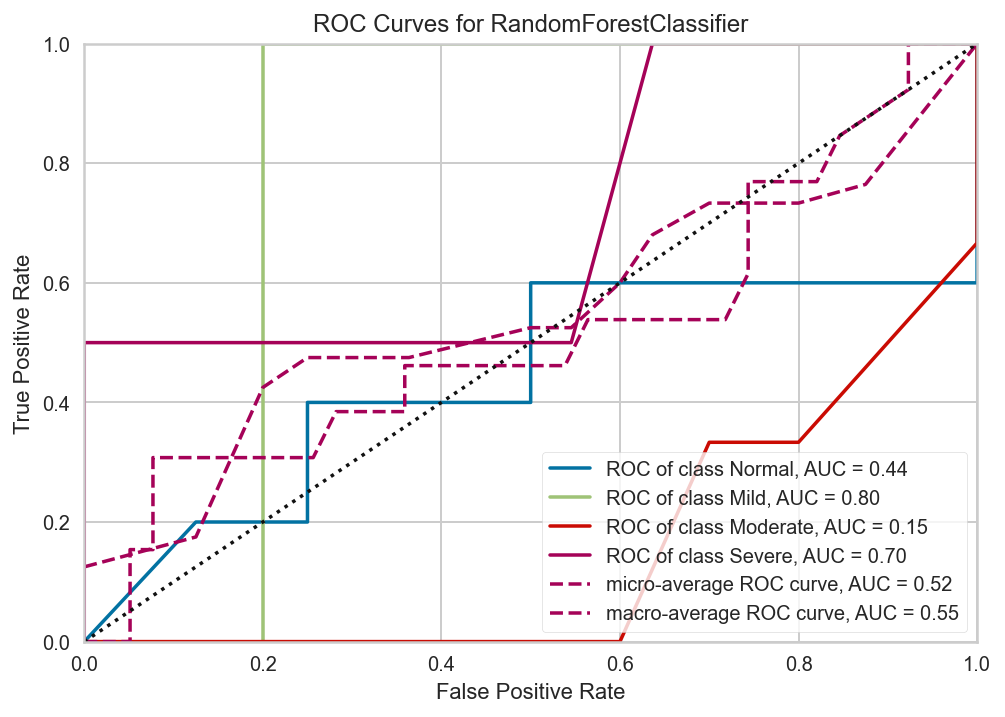

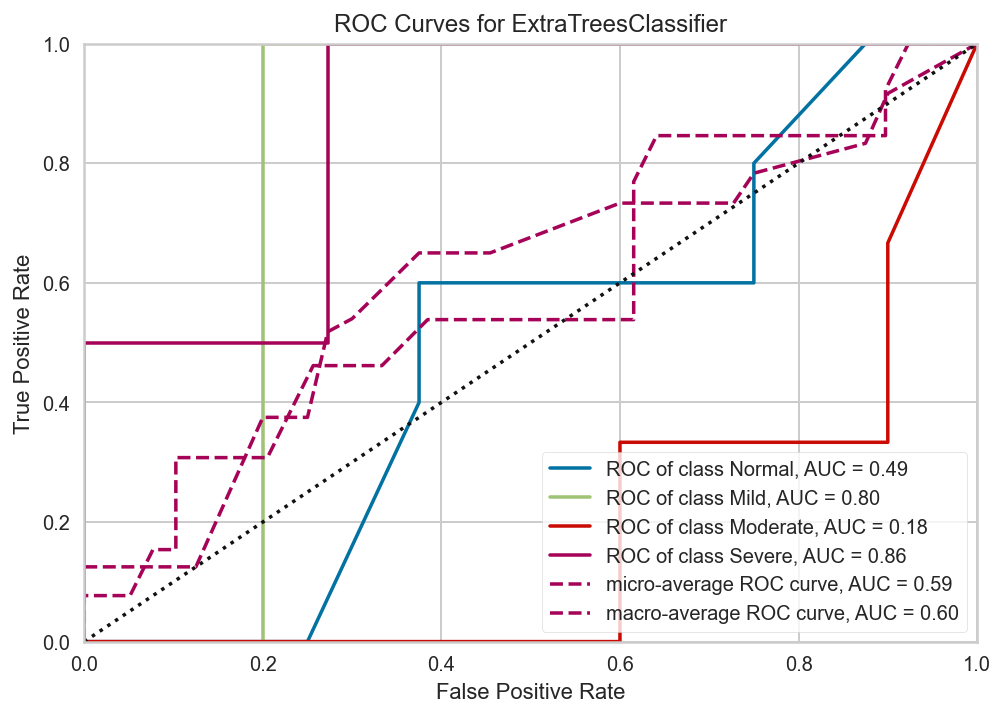

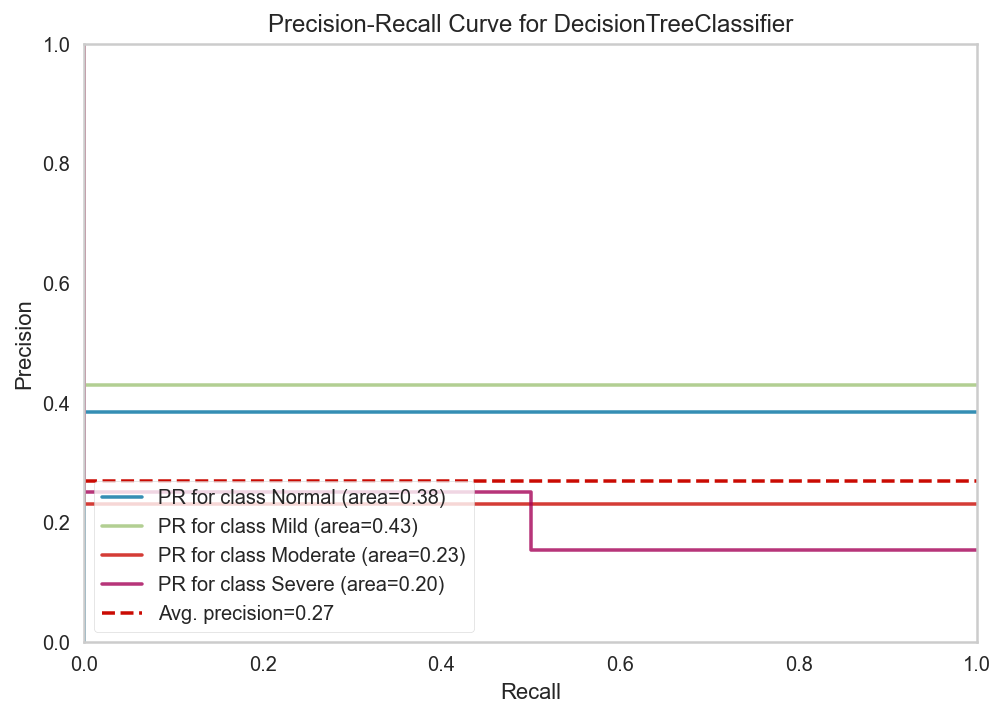

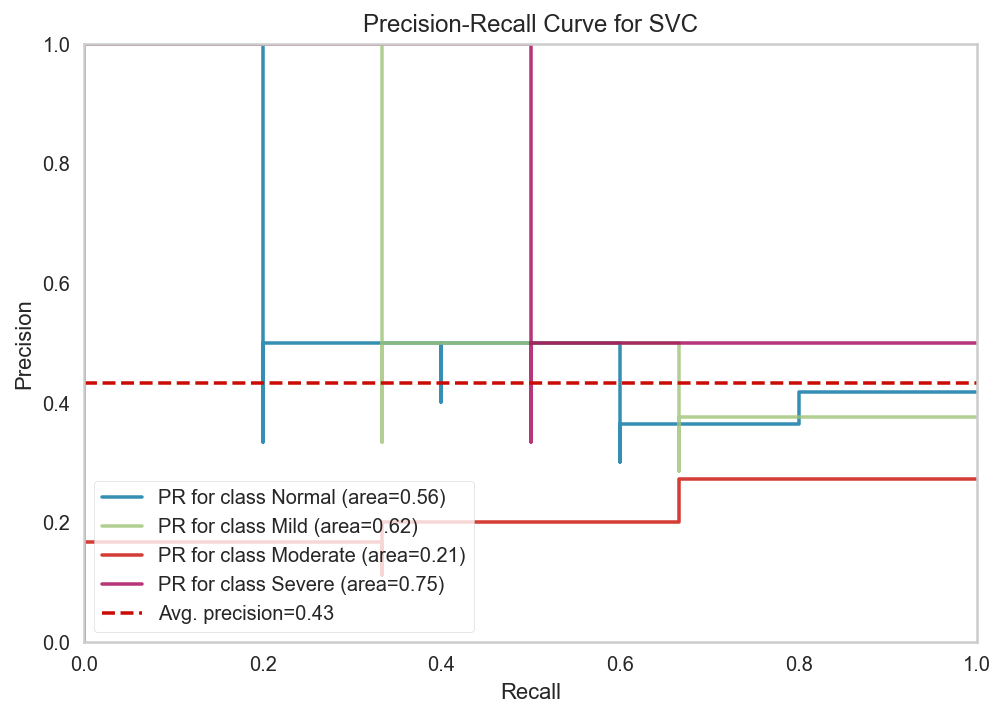

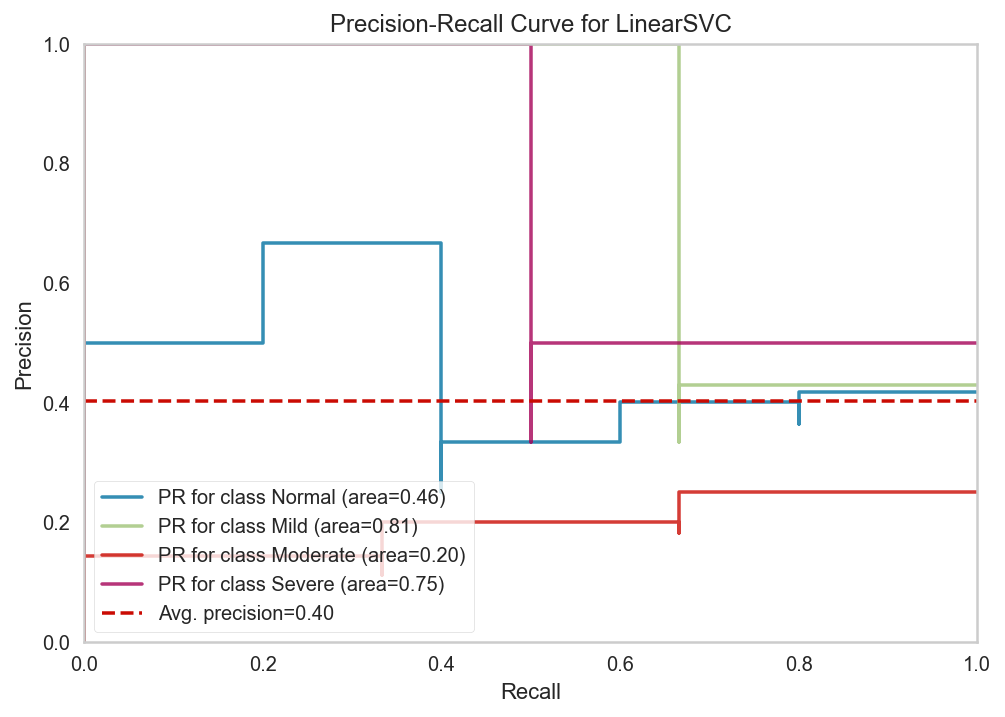

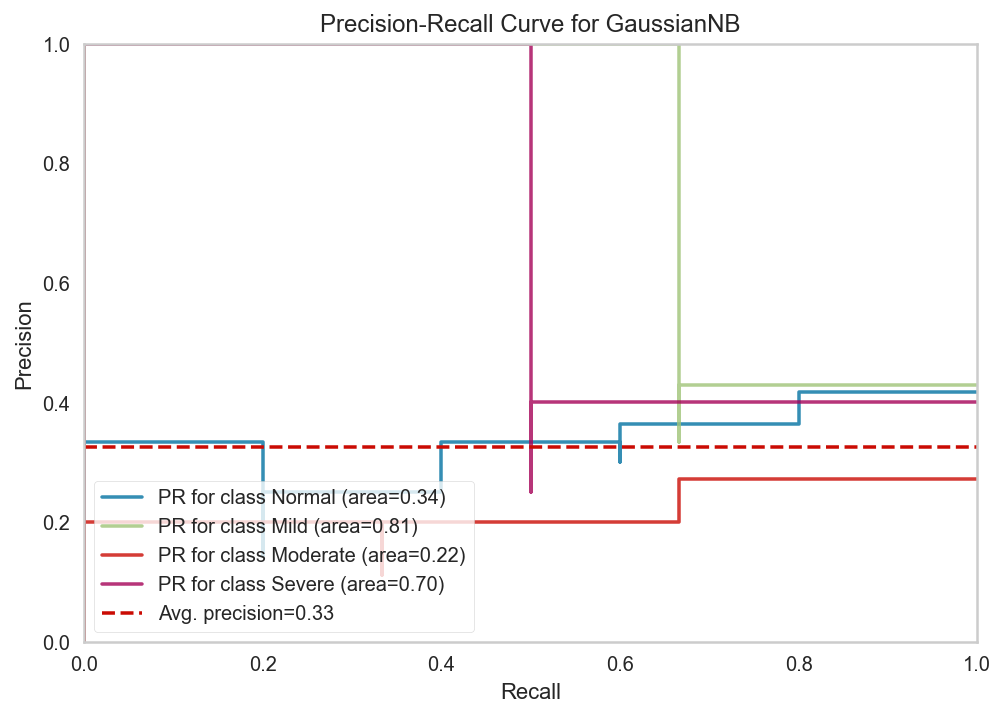

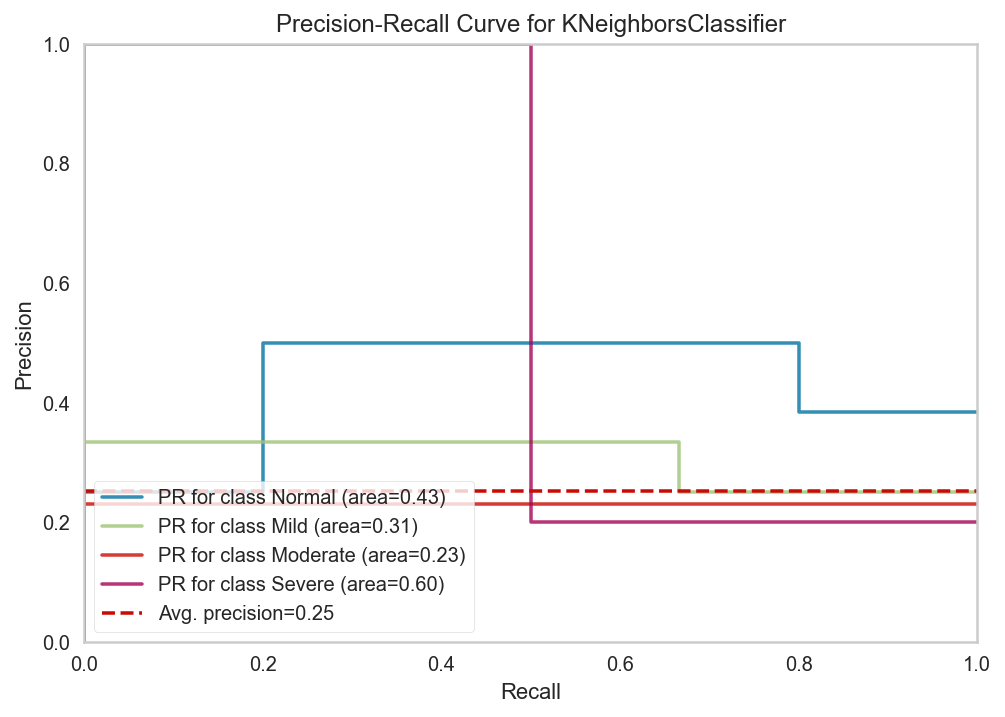

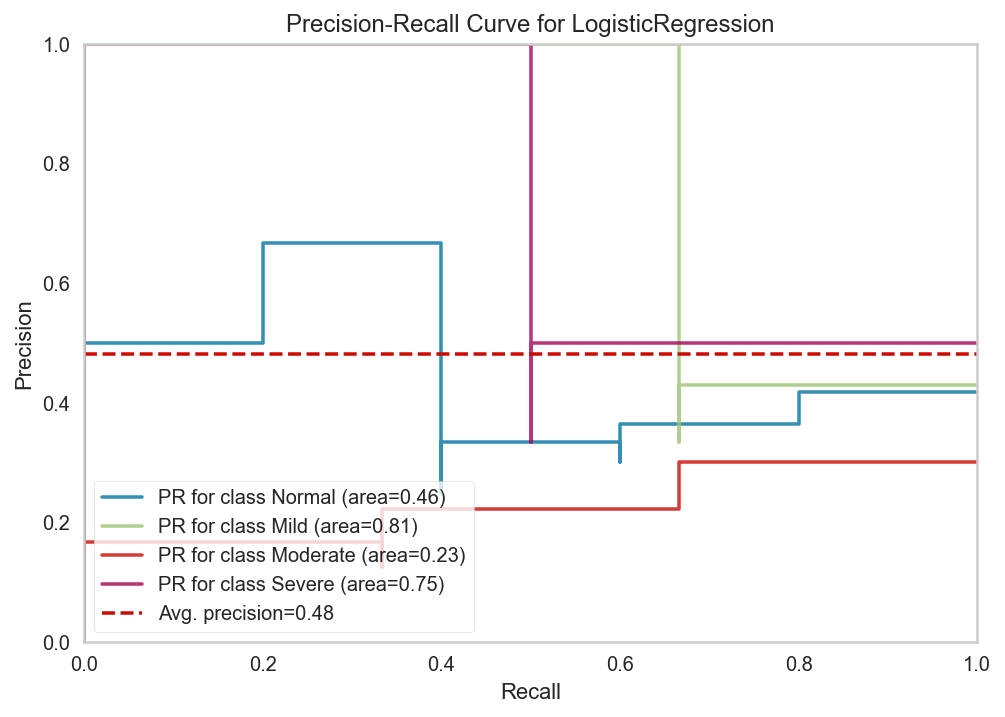

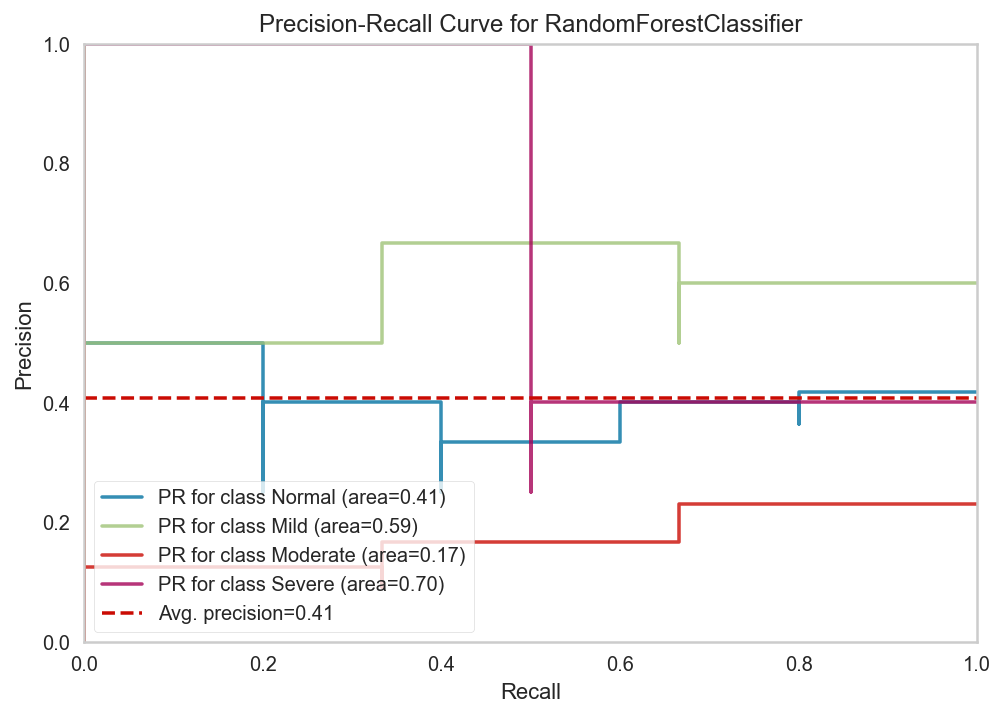

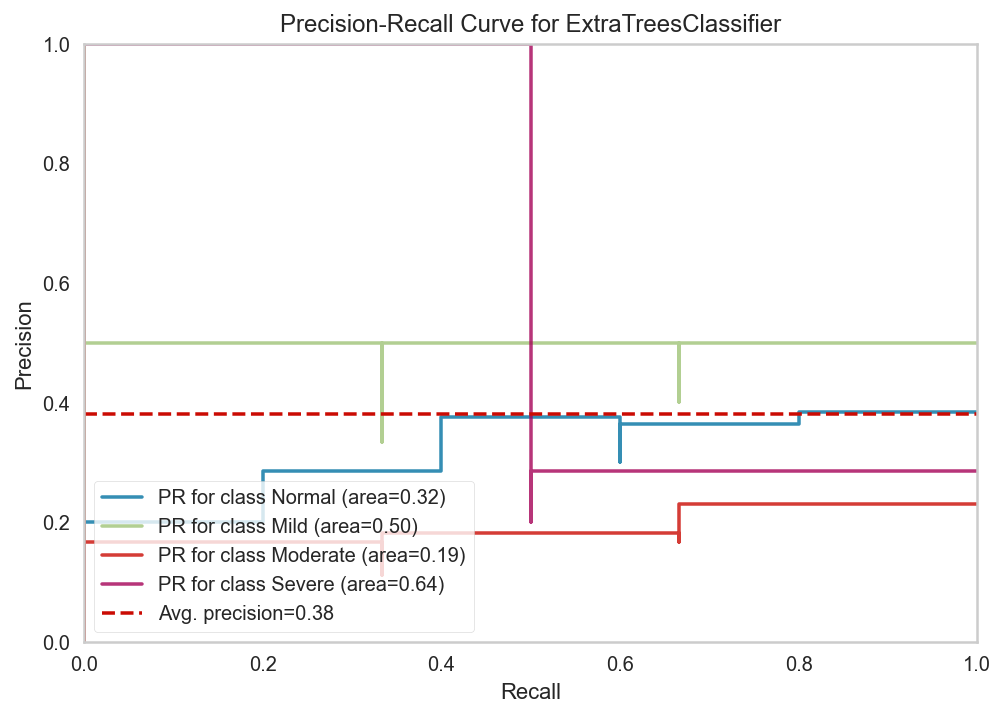

In [90]:
#deploy visualization
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]